# Data analysis project - Detecting clusters in Velib dataset

**Date:** 16th of May 2024

**Authors:** Elsa Dhnt, Jonas Gran Melandsør, Thai Doãn Kiên

4GMM, INSA Toulouse

## Introduction

Vélib' Métropole is the leading bicycle renting service in Paris. To get their services to work as best as possible, they are dependant of analysing the popularity of stations, such that they know from which stations they can fetch bikes or where to put bikes from very popular stations. Keeping track of popular stations also gives an insight into where new stations should be built. An old version of this dataset is available on their [webpage](https://www.velib-metropole.fr/donnees-open-data-gbfs-du-service-velib-metropole). From this dataset we use to files, <em>velibLoading.csv</em> which contains the ratio of available bikes at each station (loading) for each hour during a week, and <em>velibCoord.csv</em> which contains the name, latitude and longitude of each station, as well as if it is on a hill ($bonus = 1$) or not ($bonus = 0$). We have looked into this dataset to detect possible clusters.

In [1]:
# Importing relevant libraries
library(ggplot2)
library(reshape2)
library(gridExtra)
library(factoextra)
library(FactoMineR)
library(plotly)
library(ggmap)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.

Attachement du package : ‘ggmap’


L'objet suivant est masqué depuis ‘package:plotly’:

    wind




## The datasets
In this section, we import the datasets as data frames and explore their dimensions and remove missing data.


In [2]:
load <- read.csv("data/velibLoading.csv", sep=" ") # Reading data of the Velib loading
head(load)
cat("Dimension of data frame 'load'. Number of rows: ", dim(load)[1], " Number of columns: ", dim(load)[2]) 

Lun.00     Lun.01     Lun.02     Lun.03     Lun.04     Lun.05     Lun.06    
1 0.03846154 0.03846154 0.07692308 0.03846154 0.03846154 0.03846154 0.03846154
2 0.47826087 0.47826087 0.47826087 0.43478261 0.43478261 0.43478261 0.43478261
3 0.21818182 0.14545455 0.12727273 0.10909091 0.10909091 0.10909091 0.09090909
4 0.95238095 0.95238095 0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
5 0.92753623 0.81159420 0.73913043 0.72463768 0.72463768 0.72463768 0.72463768
6 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  Lun.07     Lun.08     Lun.09     ⋯ Dim.14     Dim.15     Dim.16    Dim.17    
1 0.03846154 0.10714286 0.00000000 ⋯ 0.29629630 0.11111111 0.1111111 0.14814815
2 0.43478261 0.26086957 0.04347826 ⋯ 0.04347826 0.00000000 0.2173913 0.13043478
3 0.09090909 0.05454545 0.10909091 ⋯ 0.25925926 0.25925926 0.2037037 0.12962963
4 1.00000000 1.00000000 1.00000000 ⋯ 1.00000000 1.00000000 0.9047619 0.85714286
5 0.72463768 0.75362319 0.97101449 ⋯ 0.22727273 0.45454545 0.5909091 0.83333333
6 0.16666667 0.08333333 0.00000000 ⋯ 0.34782609 0.08695652 0.1153846 0.08695652
  Dim.18     Dim.19     Dim.20     Dim.21     Dim.22    Dim.23   
1 0.30769231 0.07692308 0.11538462 0.07692308 0.1538462 0.1538462
2 0.04545455 0.17391304 0.17391304 0.17391304 0.2608696 0.3913043
3 0.14814815 0.29629630 0.31481481 0.37037037 0.3703704 0.4074074
4 0.85714286 0.85714286 0.76190476 0.76190476 0.7619048 0.7619048
5 1.00000000 0.81818182 0.63636364 0.71212121 0.6212121 0.5757576
6 0.13043478 0.08695652 0.08695652 0.43478261 0.3913043 0.5217391

Dimension of data frame 'load'. Number of rows:  1189  Number of columns:  168

In [3]:
coord = read.csv('data/velibCoord.csv', sep = " ") # Reading coordinates for each loading
head(coord)
cat("Dimension of data frame 'coord'. Number of rows: ", dim(coord)[1], " Number of columns: ", dim(coord)[2]) 

longitude latitude bonus names               
1 2.377389  48.88630 0      EURYALE DEHAYNIN   
2 2.317591  48.89002 0      LEMERCIER          
3 2.330447  48.85030 0      MEZIERES RENNES    
4 2.271396  48.83373 0      FARMAN             
5 2.366897  48.84589 0      QUAI DE LA RAPEE   
6 2.363335  48.82191 0      CHOISY POINT D'IVRY

Dimension of data frame 'coord'. Number of rows:  1189  Number of columns:  4

### Data cleaning

In [4]:
cat('Shape of "load" :', dim(load))
number_of_missing_values_load <- sum(is.na(load))
number_of_duplicate_values_load <- sum(duplicated(load))
cat('\nNumber of missing values "load"', number_of_missing_values_load)
cat('\nNumber of duplicate values "load":', number_of_duplicate_values_load,"\n")

cat('\nShape of "coord" :', dim(coord))
number_of_missing_values_coord <- sum(is.na(coord))
number_of_duplicate_values_coord <- sum(duplicated(coord))
cat('\nNumber of missing values "coord"', number_of_missing_values_coord)
cat('\nNumber of duplicate values "coord":', number_of_duplicate_values_coord)


Shape of "load" : 1189 168
Number of missing values "load" 0
Number of duplicate values "load": 0 

Shape of "coord" : 1189 4
Number of missing values "coord" 0
Number of duplicate values "coord": 0

## Descriptive part

In [5]:
station_names <- table(coord$names)
station_names <- sort(station_names,decreasing=TRUE)
head(station_names)
indexes <- which(station_names>1)
print(station_names[indexes])
cat("\nNumber of stations with multiple occurences in coord:", length(station_names[indexes]))


 GARE D'AUSTERLITZ    PORTE DES LILAS    ALEXANDRE DUMAS            AQUEDUC 
                 3                  3                  2                  2 
          BASTILLE         BELLEVILLE 
                 2                  2 


     GARE D'AUSTERLITZ        PORTE DES LILAS        ALEXANDRE DUMAS 
                     3                      3                      2 
               AQUEDUC               BASTILLE             BELLEVILLE 
                     2                      2                      2 
     BOURSE DU TRAVAIL               BROCHANT           CHERCHE MIDI 
                     2                      2                      2 
                CLICHY                   DODU  FAURE (AUBERVILLIERS) 
                     2                      2                      2 
    FRANCE (LEVALLOIS)          GARE DE L'EST               JOURDAIN 
                     2                      2                      2 
              LACEPEDE               LEGENDRE     PARC DE BELLEVILLE 
                     2                      2                      2 
            PORT ROYAL      PORTE DE BAGNOLET    PORTE DE SAINT OUEN 
                     2                      2                      2 
        RICHARD LEN

In [6]:
name_checkup <- c(' PORTE DES LILAS', ' CLICHY')
multiple_stat <- coord$names %in% name_checkup
stat_rel <- coord[multiple_stat,]
print(stat_rel)

    longitude latitude bonus            names
29   2.328807 48.88413     0           CLICHY
362  2.404770 48.87660     1  PORTE DES LILAS
450  2.405960 48.87541     1  PORTE DES LILAS
500  2.326207 48.88332     0           CLICHY
957  2.411046 48.87810     1  PORTE DES LILAS


In [7]:
#cleaningfig <- qmplot(data=stat_rel, longitude, latitude, color = names, zoom = 16) + 
#    labs(title = paste('Placement of stations with multiple occurances:',paste(name_checkup, collapse = ',')))
#fig

Looking at two different stations with multiple occurences, we can see that they are really close geographically. We can suppose that the velib there are often used. Let's take a look at the loading of the station Porte des Lilas.


No id variables; using all as measure variables

No id variables; using all as measure variables

No id variables; using all as measure variables



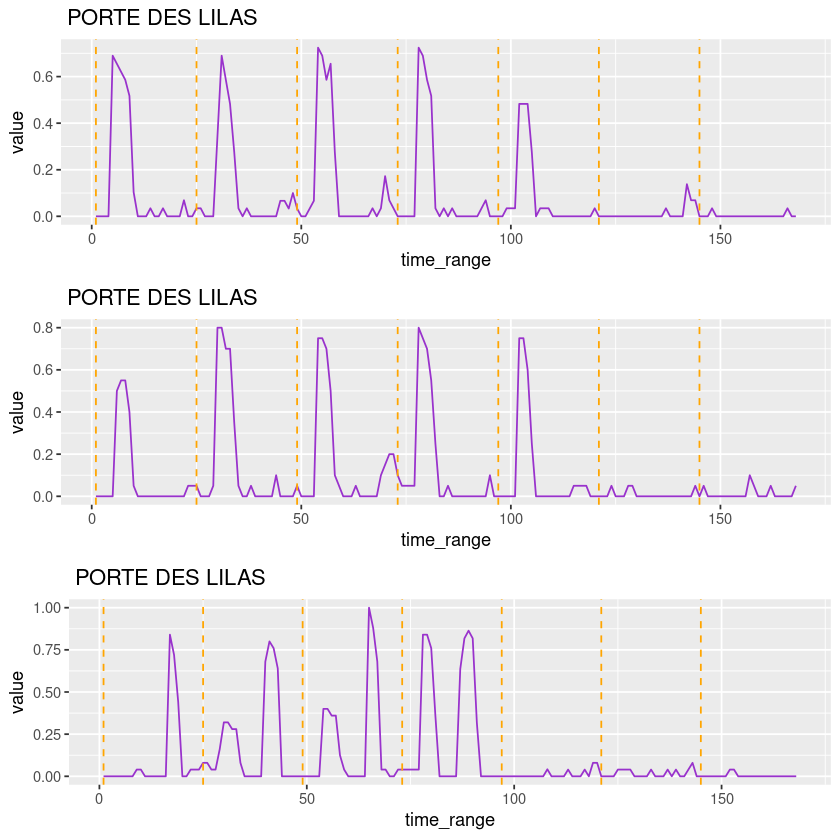

In [8]:
time_tick = 1 + 24*(0:6) 

ind <- which(coord$names == " PORTE DES LILAS")
i1 <- ind[1]

df = melt(load[i1,])  
df$time_range = 1:ncol(load)

p1 = ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=coord$names[i1])

i2 <- ind[2]
df = melt(load[i2,])
df$time_range = 1:ncol(load)

p2 = ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=coord$names[i2])

i3 <- ind[3]

df = melt(load[i3,]) 
df$time_range = 1:ncol(load)

p3 = ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=coord$names[i3])

p <- list(p1,p2,p3)
do.call(grid.arrange,p)

Indeed, we can clearly see that the loading of those station are often near 0. It moves a lot so we can imagine that the velib are put there the morning and directly used by the inhabitants to go to work. We can maybe explain that there is only one time in the day where the loading is high by the fact that this station is on a hill. We can suppose that the people are using the velib to go down to work and then take the public transport to go back up. What back this is the fact that the loading stays low also during the week-end, since there is no large transfer of bikes at this stations during the weekend. Let's compare Porte des Lilas with the station Clichy, which is not on a hill.


No id variables; using all as measure variables

No id variables; using all as measure variables



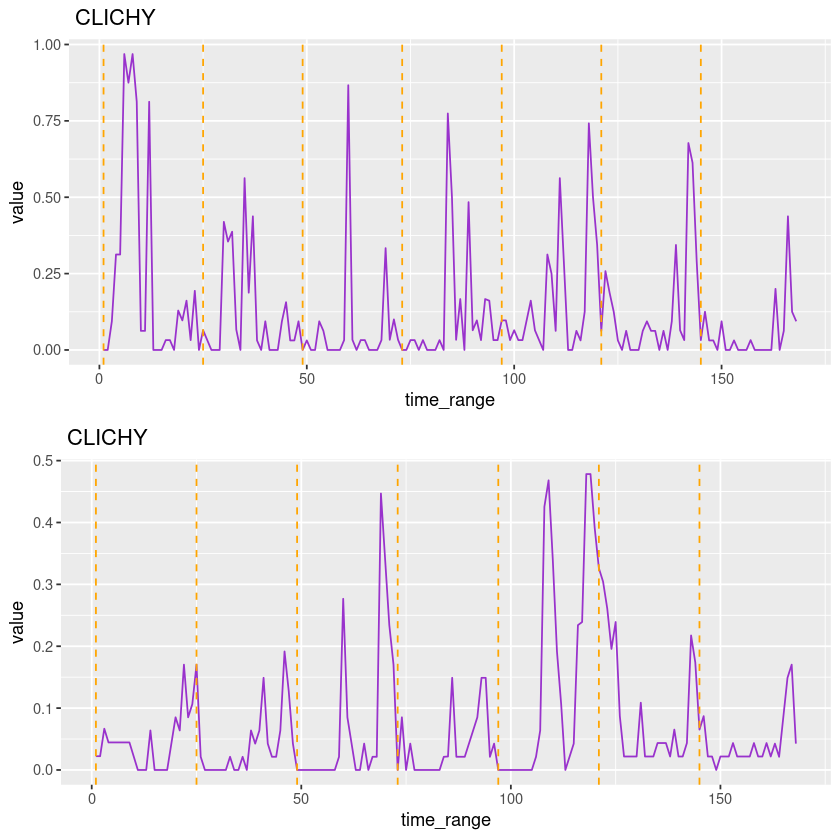

In [9]:
ind <- which(coord$names == " CLICHY")
i1 <- ind[1]

df = melt(load[i1,])  
df$time_range = 1:ncol(load)

p4 = ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
     geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
     labs(title=coord$names[i1])

i2 <- ind[2]
df = melt(load[i2,])
df$time_range = 1:ncol(load)

p5 = ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
     geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
     labs(title=coord$names[i2])


p <- list(p4,p5)
do.call(grid.arrange,p)

Here the loading is highly variying, and is therefore not easy to interpret. Taking a look of the placement of this station, it is just beneath Montmartre and Sacré-Coeur, both on a steep hill. Theese areas are popular, also for tourism. The combination of many visiting people and the steep hill nearby, may be some of the reasons for the loading not exhibiting a periodicity like in the loading of Porte des Lilas. To see how this compares to the rest of the data set, we find the average loading of the stations, as well as the least loaded and most loaded stations.


In [10]:
print('--- Average loading ---')
mean <- rowMeans(load) # Average per station
tot_mean <- mean(mean)
print(round(tot_mean,4))

# --- #
print(" ")
print('--- Least loaded station, on average ---')
print(paste(coord[which.min(mean),],round (min(mean),4)))
# --- 

print('')

print('--- Fullest loaded station, on average ---')
print(paste(coord[which.max(mean),],round (max(mean),4)))

# --- 
print("--- Average loading of station CLICHY ---")
print((mean[i1]+mean[i2])/2)


[1] "--- Average loading ---"
[1] 0.3816
[1] " "
[1] "--- Least loaded station, on average ---"
[1] "2.42793357977893 0.0161"   "48.8739292000335 0.0161"  
[3] "1 0.0161"                  " HORNET (BAGNOLET) 0.0161"
[1] ""
[1] "--- Fullest loaded station, on average ---"
[1] "2.39826154064032 0.9194"              
[2] "48.814660082168 0.9194"               
[3] "0 0.9194"                             
[4] " INSURRECTION AOUT 1944 (IVRY) 0.9194"
[1] "--- Average loading of station CLICHY ---"
        29 
0.09970553 


The average loading of the stations Clichy is clearly lower than the average loading of all the stations. The velib there are then often used. It explains the fact that there is two stations at the same place there. However, we can see that the station Hornet (Bagnolet) is often empty but is not part of the station with multiple occurrences. It would maybe be useful to add one more. On the other hand, some stations are not that useful. Indeed, the station Insurrection aout 1944 (Ivry) is almost full at every hour of the day, with an average loading of almost 92%. Let's take a closer look.


No id variables; using all as measure variables



Lowest loading: 0.567

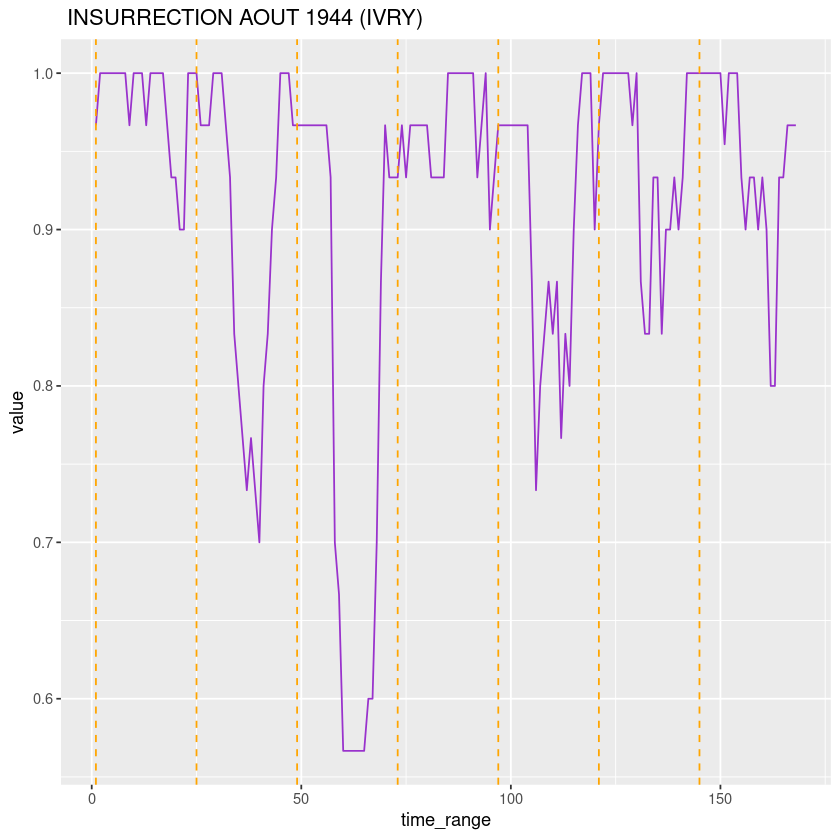

In [11]:
ind <- which(coord$names == " INSURRECTION AOUT 1944 (IVRY)")
i <- ind[1]

df = melt(load[i,])  
df$time_range = 1:ncol(load)

p6 <- ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=coord$names[i])
p6
cat("Lowest loading:", round(min(load[i,]), 3))


We can now see that the lower loading is almost of 57% on wednesday but it is hard to explain why. A possible explanation is that this data set is based on just one week of tracking loading. That means that the data might be subject to extraordinary happenings, like system malfunctioning or class trip with bicycles for a children school. Except for the large drop on wednesday, the loading does not go under 70%. Let's now take a look at the entire data frame.


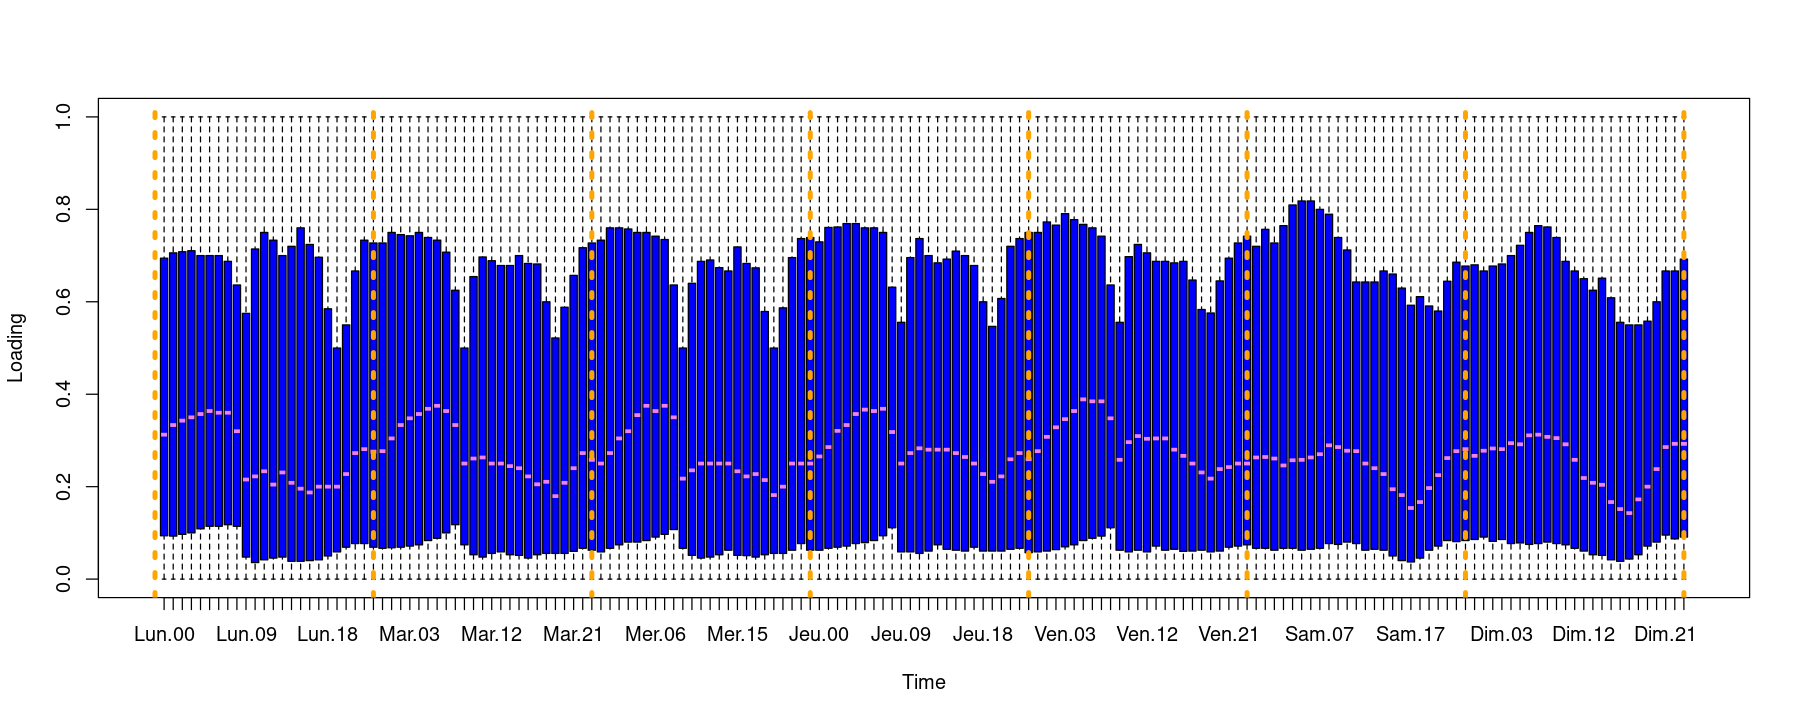

In [12]:
time_ticks <- seq(0,168, by = 24)

options(repr.plot.width = 15, repr.plot.height = 6)
p_bp <- boxplot(load, xlab = "Time", ylab = "Loading", col = "blue", medcol ="violet")
abline(v = time_ticks, col = "orange", lwd = 4, lty = "dotted")

We can see that the behavior of stations loading is similar every weekday. There are also strong reasemblance between the Saturday and Sunday as well, both in the distribution of the boxplot and in the shape of the graph of the median. The median load rate remains between 20% and 40%, so we can deduce that there is an imbalance in the use of the various stations. 

To better illustrate how the loading changes for each hour each day, we plot the mean of over all stations per hour per day.


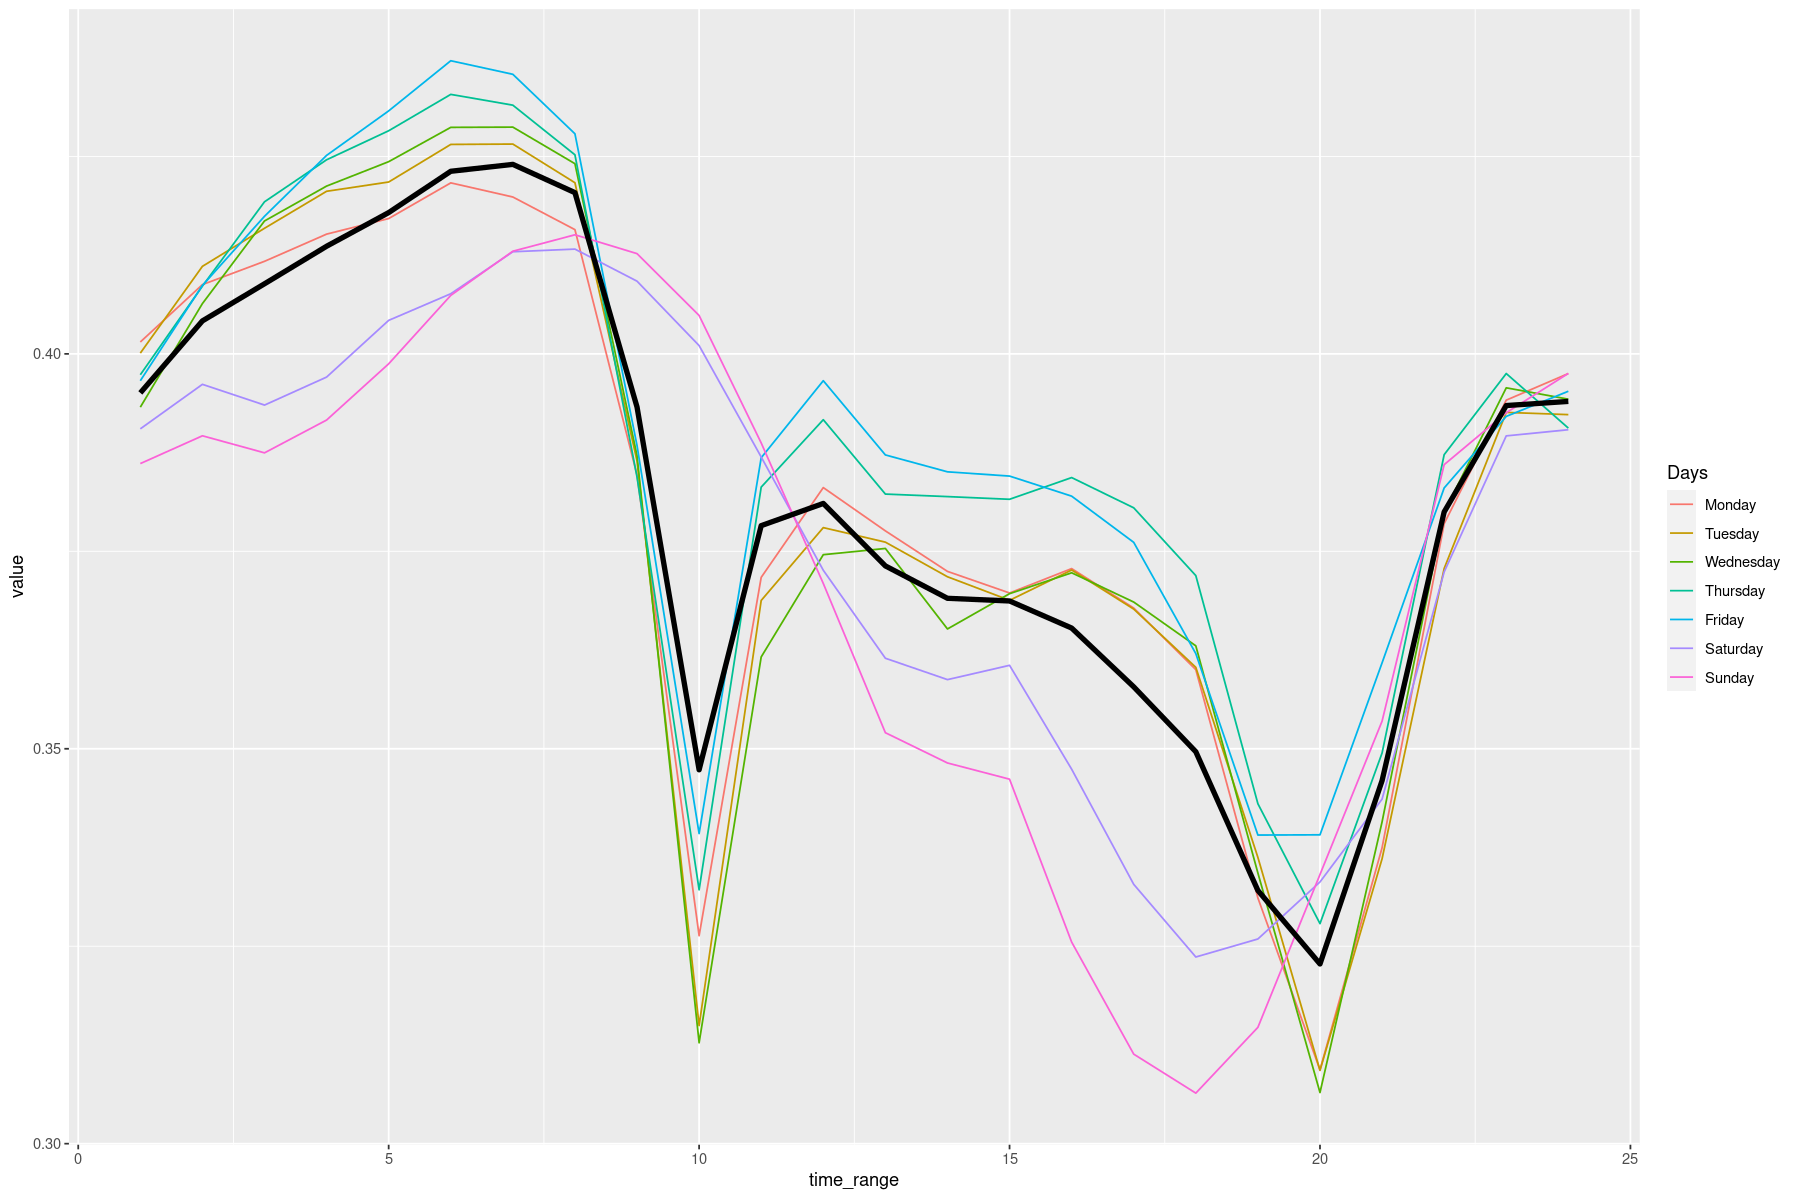

In [13]:
mean_per_hour_per_day = colMeans(load)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)

# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

# --- #

options(repr.plot.width = 15, repr.plot.height = 10)

p_mean_day <- ggplot() + 
                geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
                geom_line(data=mean_per_hour, aes(x=time_range, y=Weekly), linewidth = 1.5)
p_mean_day

For the weekdays, we can clearly see that the average loading evolves more or less in the same way. The stations are fuller in the morning, then people probably goes to work by bike between 8am and 10am. Many stations must have a really low loading rate at 8pm. In the weekend, the average loading is the lowest around 6pm. The velib are, in average, more used.

To see how the distribution of loading is spread out spacially in Paris, we can plot a of all stations and give all point a colour corresponding to the level of loading. We plot four maps like this for monday, evenly spreaded out during the day. Plot three similar figures for Saturday, as well, to compare with the weekends. This will give some insight into the most popular areas in Paris for Vélib'.


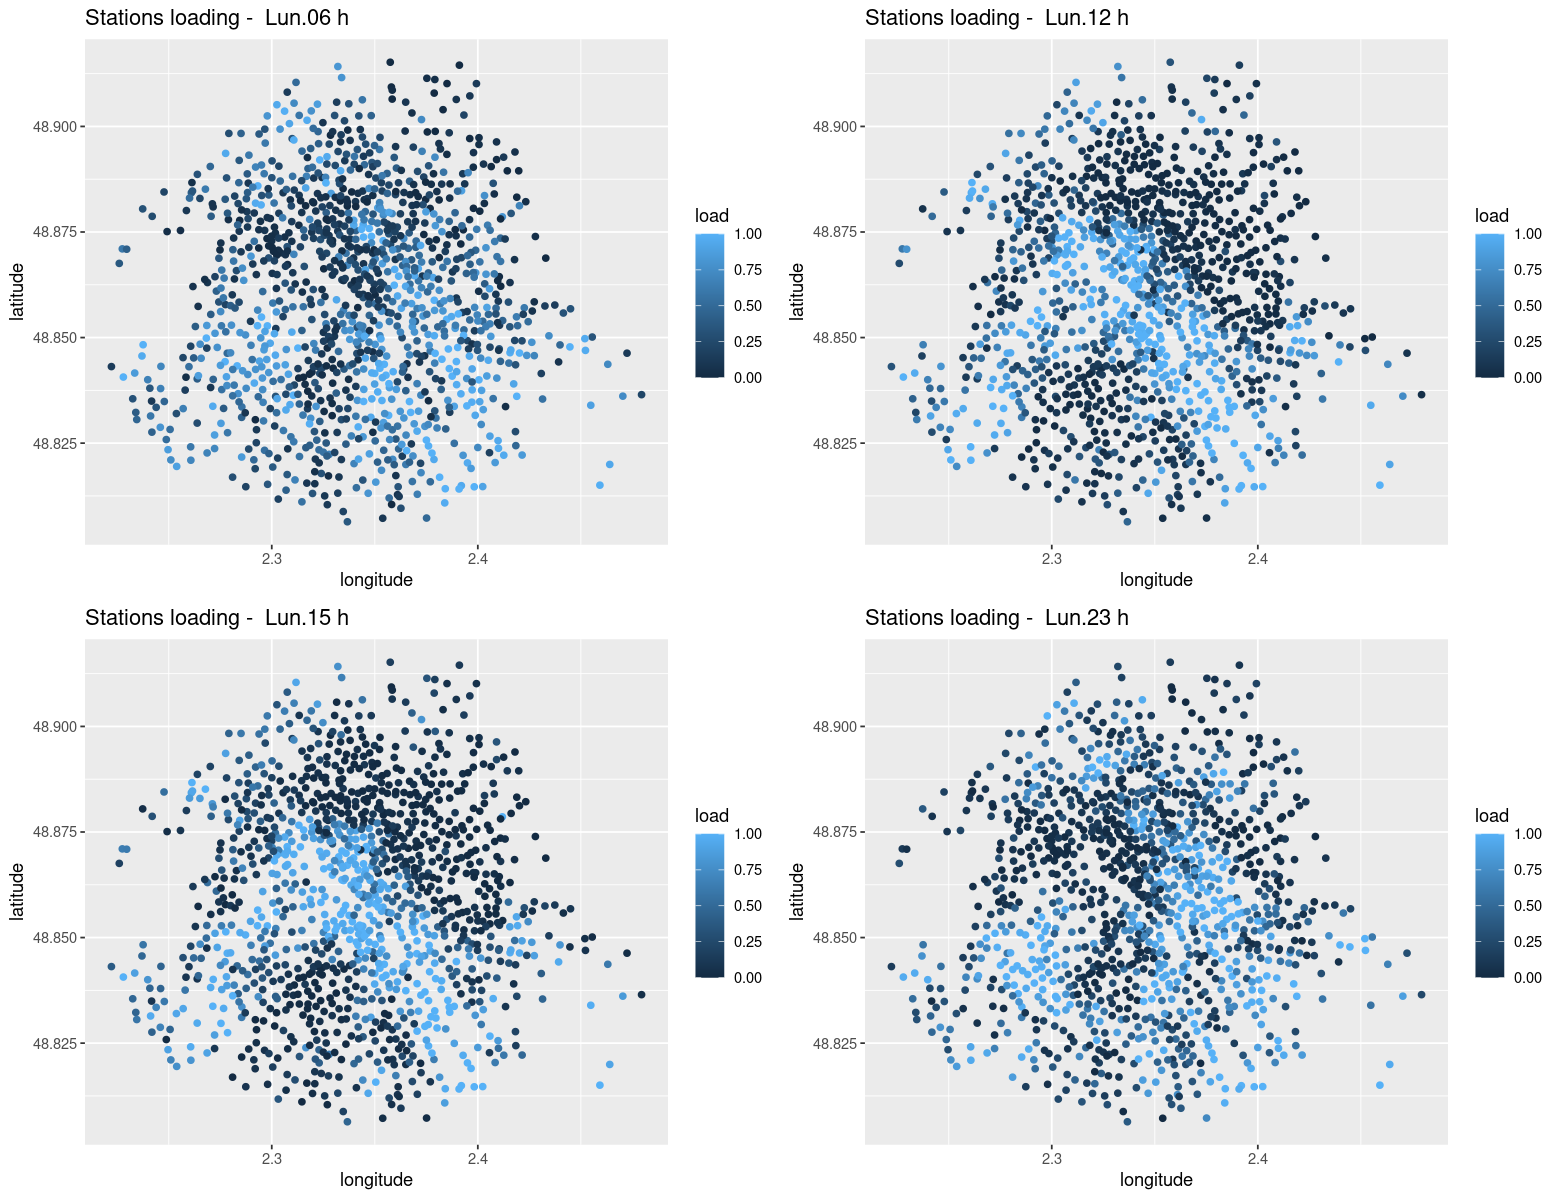

In [14]:
noms_col <- names(load)

options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 12,15, 23)

dfi = coord
p7 = list()
for (i in 1:length(hours)){
    dfi$load = load[,hours[i]+1]
    p7[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
        geom_point() +
        labs(title = paste("Stations loading - ",noms_col[hours[i]+1],"h"))
}

do.call(grid.arrange,c(p7, ncol=2))


We can see that early in the morning et late in the evening, the stations the busiest stations are all around Paris center. However, during the day, they are all along the Seine. We can imagine that people are taking velib to go to work and go back home. Moreover, when we took a look at the map of the cycle paths of Paris, we can see that most of them are along the Seine. We can suppose that people prefer to ride a bike on a cycle path and then leave the bike when the path stops to finish their routes by walk or public transport.


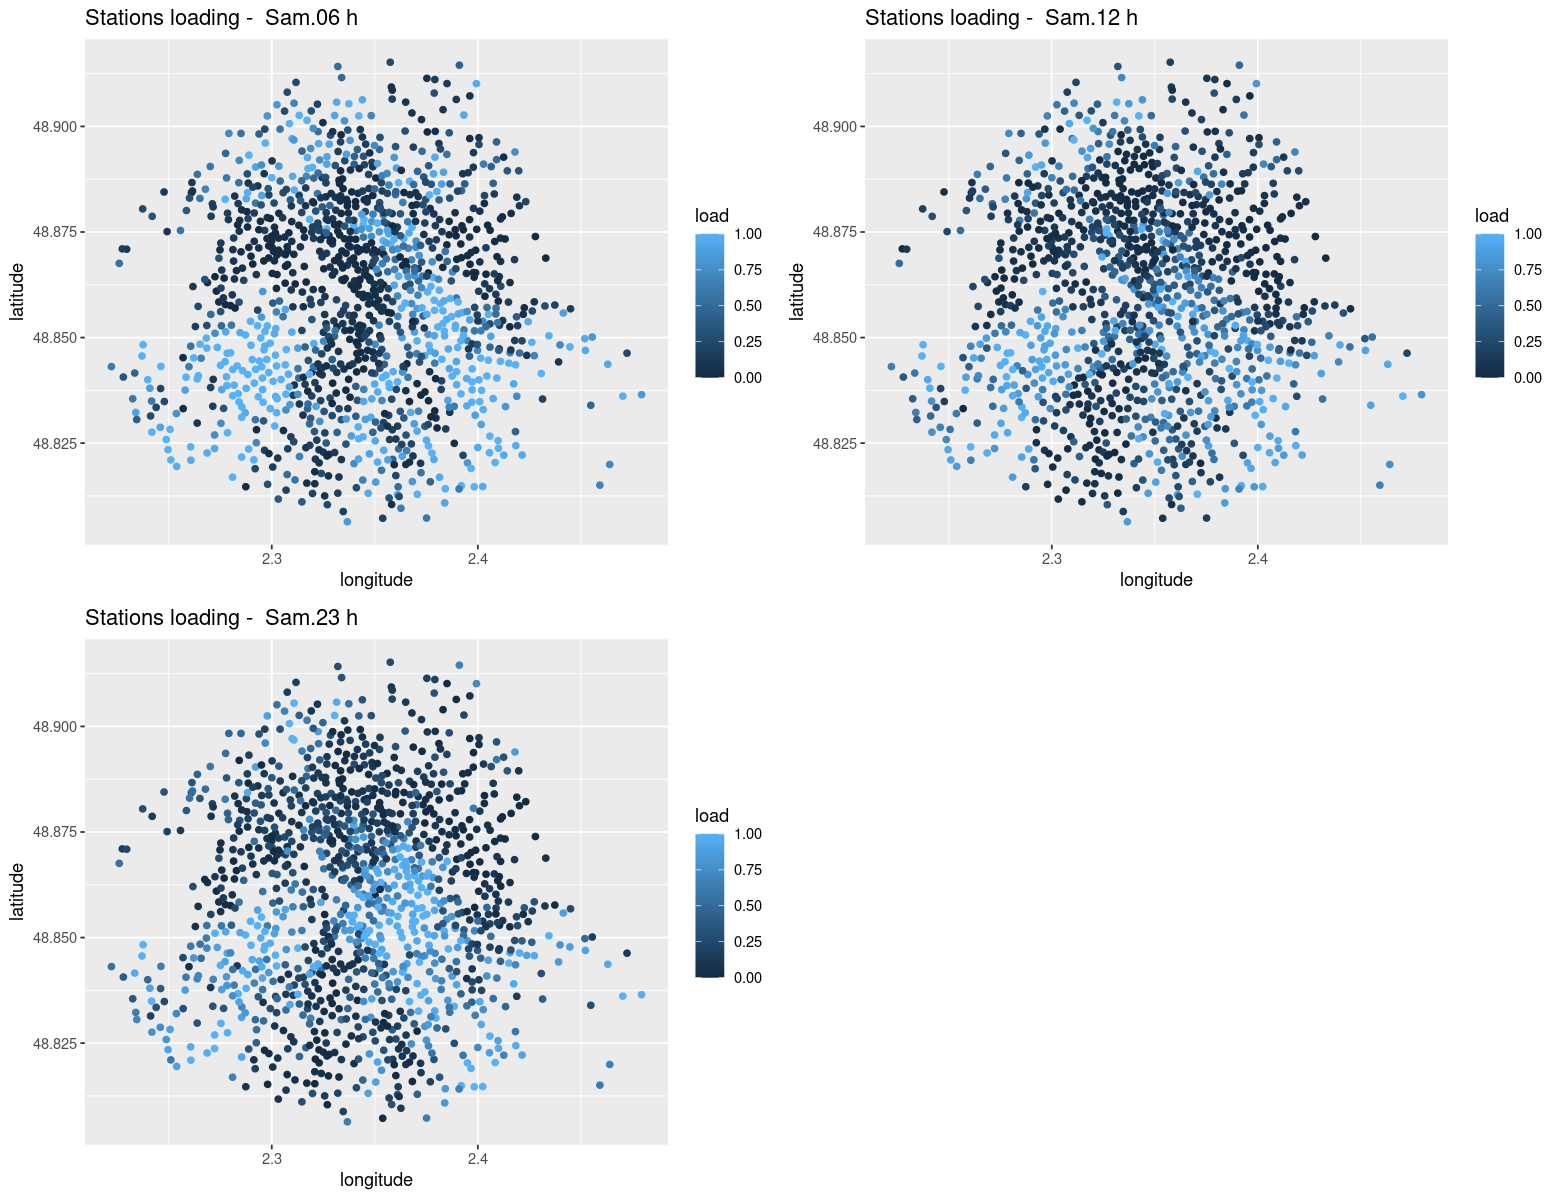

In [15]:
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(126, 132, 143)

dfi = coord
p8 = list()
for (i in 1:length(hours)){
    dfi$load = load[,hours[i]+1]
    p8[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
        geom_point() +
        labs(title = paste("Stations loading - ",noms_col[hours[i]+1],"h"))
}

do.call(grid.arrange,c(p8, ncol=2))

For the weekend, here the saturday, we can see that the velibs are globally more used. However, we can imagine that people are not going far from their place because the busiest stations stay the same more or less throughout the day. The stations are even busier at 6am, we can deduce that people are not going outside that early in the weekend.


Number of stations on a hill:  127 
Number of stations not on a hill:  1062

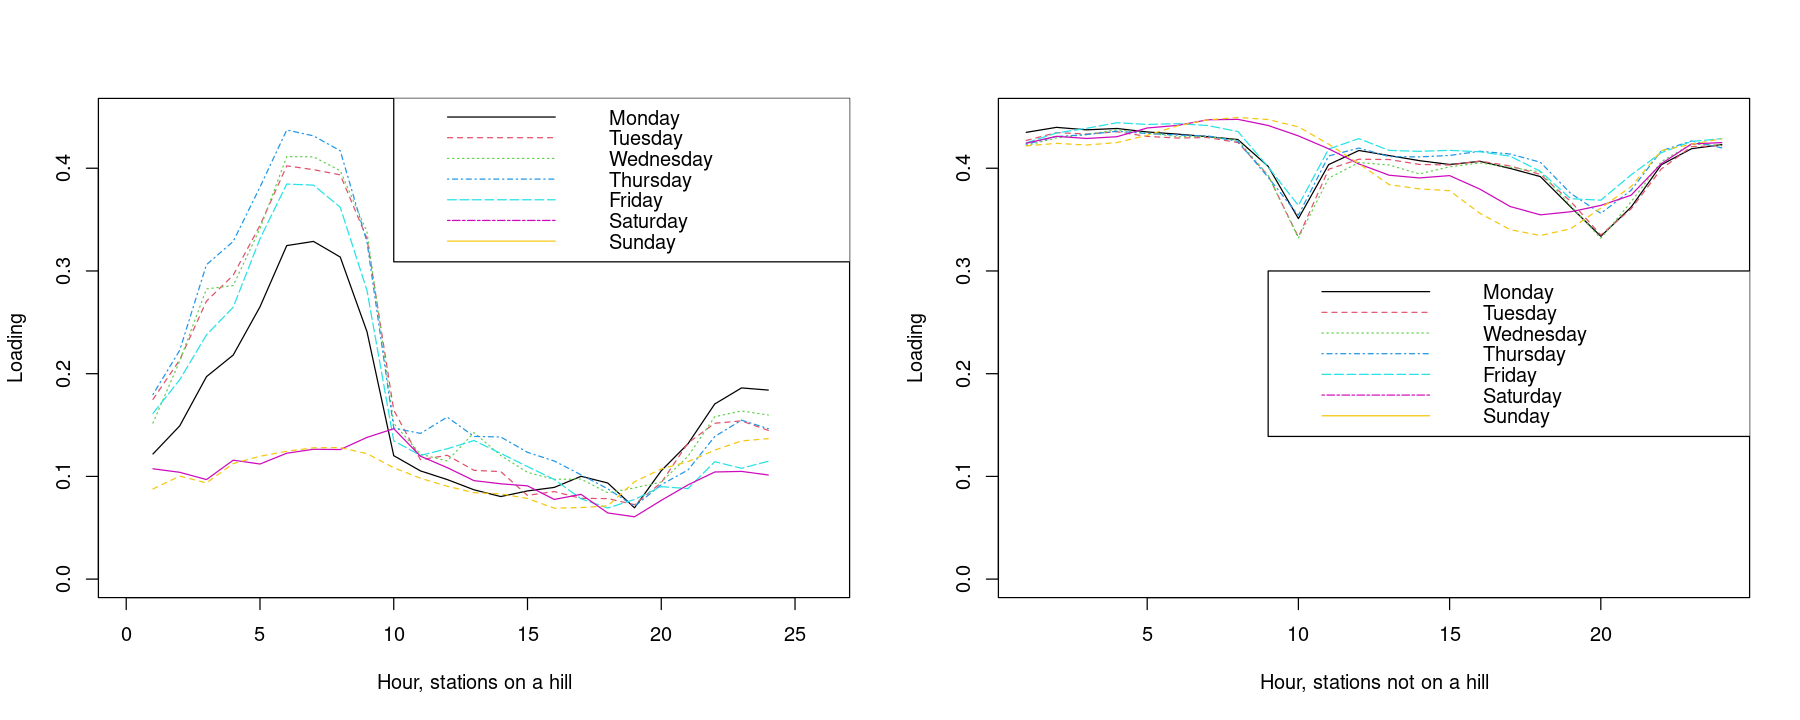

In [16]:
Hill <- load[coord$bonus == 1, ]
NoHill <- load[coord$bonus == 0, ]
options(repr.plot.width = 15, repr.plot.height = 6)

day <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
HourHill <- matrix(colMeans(Hill), nrow = 24) # average loading of a station on the hill per hour for one day
HourNoHill <- matrix(colMeans(NoHill), nrow = 24) # average loading of a station not on the hill per hour for one day

options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 2))

matplot(HourHill, type = "l", xlim = c(0,26), ylim = c(0, 0.45), col = 1:7, pch = 19, 
            xlab = "Hour, stations on a hill", ylab = "Loading")
legend(x = 10, y = 0.47, day,lty = 1:7, col = 1:7)

matplot(HourNoHill, type = "l", ylim = c(0, 0.45), col = 1:7, pch = 19, 
               xlab = "Hour, stations not on a hill", ylab = "Loading")
legend(x = 9, y = 0.3, day, lty = 1:7, col = 1:7)

cat("Number of stations on a hill: ", dim(Hill)[1], "\n")
cat("Number of stations not on a hill: ", dim(NoHill)[1])

When we compare the stations that are located on a hill and those that are not on a hill, we can see a clear difference of the loading. During the weekdays, the loading of the stations of a hill is really low (between 0 et 20 %). People must use the bikes to go down to work and take the public transports to go back up, as we said earlier. During the weekend, those stations are always almost empty. However, for the stations that are not on a hill, the average loading per hour is higher (between 30 et 50%) and stays always in same range. 

Between 0h and 6h of the weekdays, the means of the loading hill stations have increases between 2-300%. This might be because of redistribution of bikes, such that the stations which naturally loose bikes will have bikes for use for people going to work in the morning. Since the mean of hill stations is exhibiting this large peak, bikes must be taken from the non-hill stations. The reason for the mean not decreasing correspondingly is that they are more than eight time as many as the number of hill stations. 


## PCA



eigenvalue percentage of variance cumulative percentage of variance
comp 1 66.888963  39.814859              39.81486                         
comp 2 39.486446  23.503837              63.31870                         
comp 3  8.867649   5.278363              68.59706                         
comp 4  7.305326   4.348408              72.94547                         
comp 5  5.503113   3.275662              76.22113                         
comp 6  3.245742   1.931989              78.15312

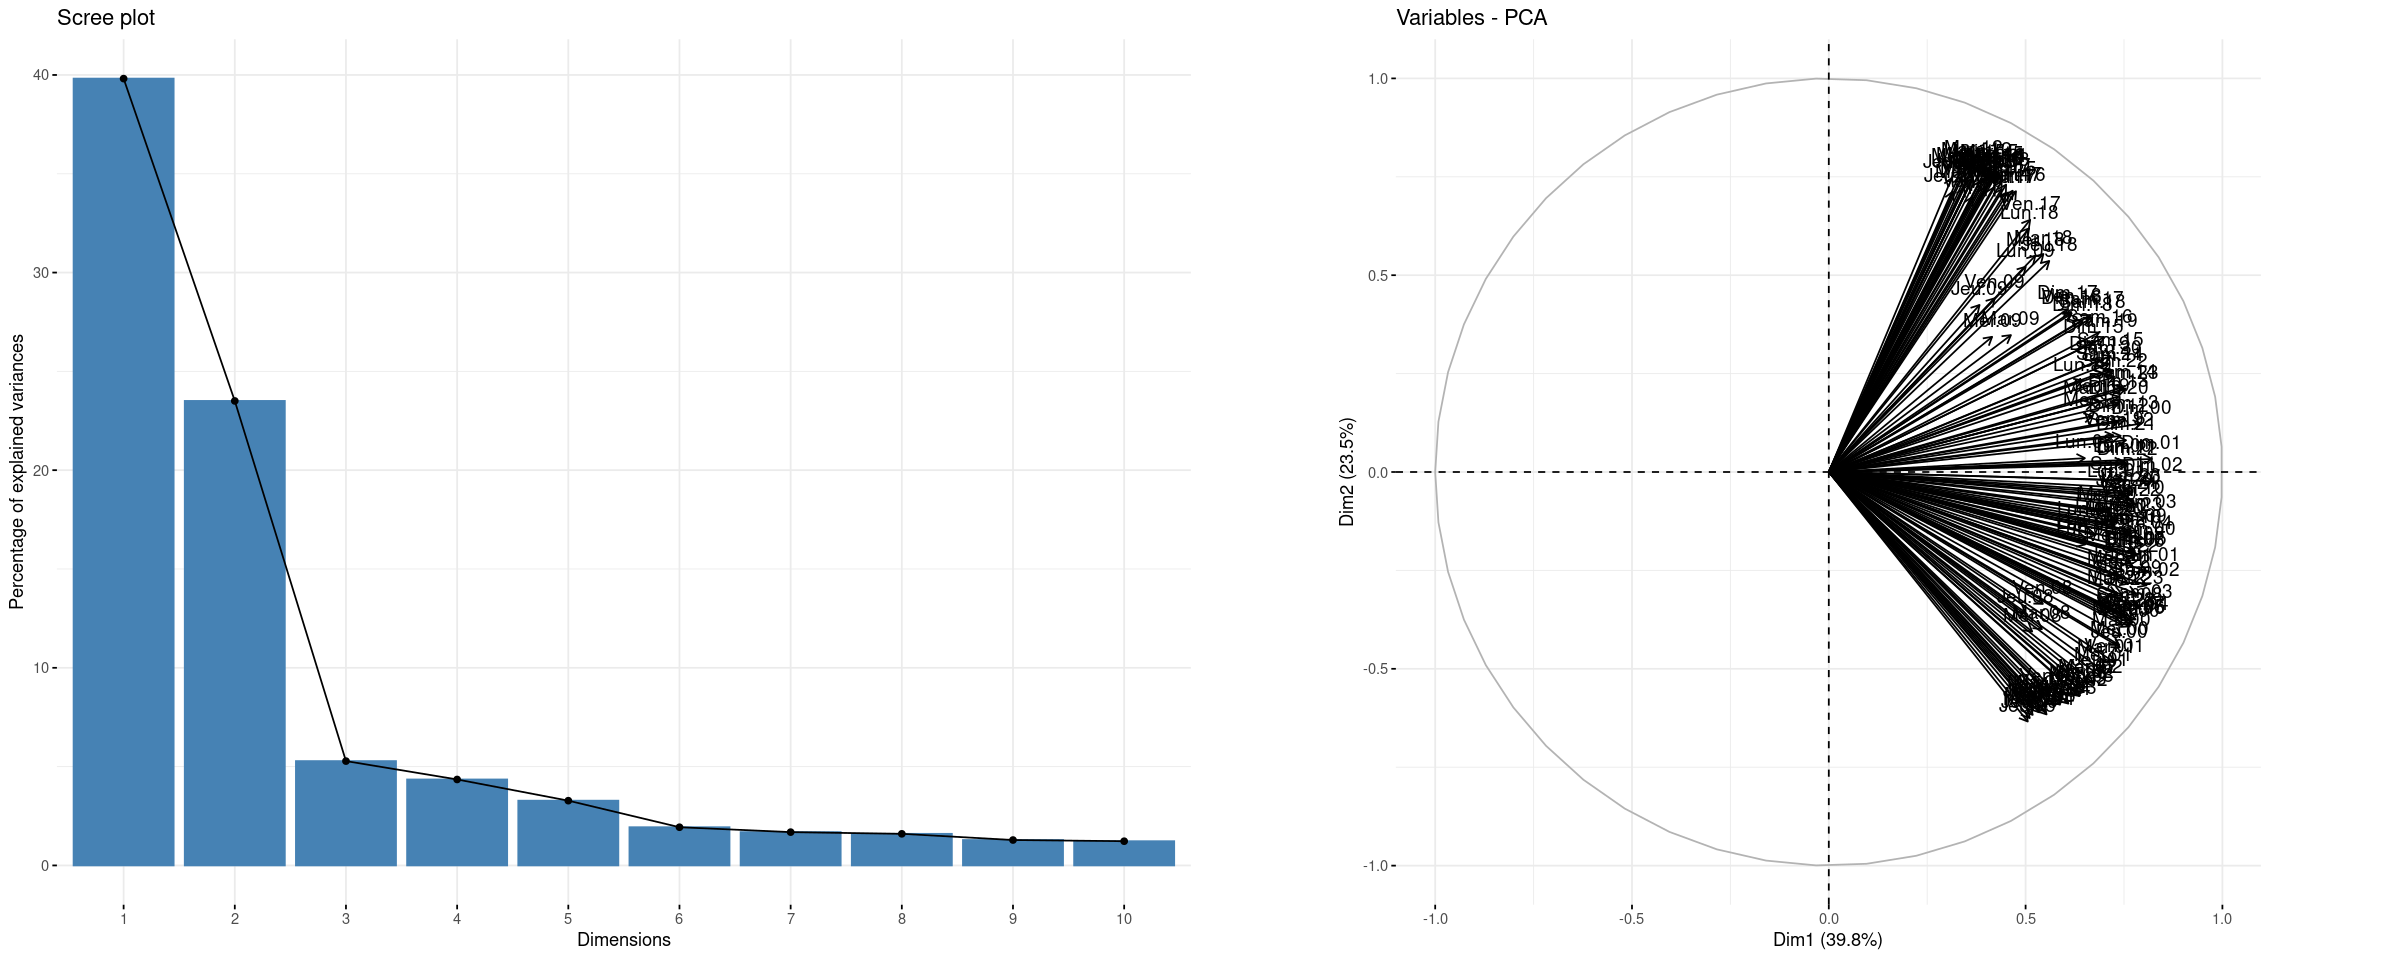

In [17]:
options(repr.plot.width = 20, repr.plot.height = 8)
pca = PCA(load, scale.unit = TRUE,ncp =20, graph=FALSE)

# Visualisation of explained variance and variables
grid.arrange(fviz_eig(pca),fviz_pca_var(pca,axes=c(1,2)),ncol=2)

head(pca$eig)


From the table of eigenvalues for the PCA, we see that all the eigenvalues for principal components $1-6$ are above one, meaning that they explain more than a single variable. They are then all relevant principal components according to the Kaiser's rule. We do nonetheless chose to keep only four components as they together explain $(72.9 \%)$ of the variances, at the same time as adding more components does not win us a considerable amount of explained variances. This is a strong dimensional reduction, as the dataset contains as much as $168$ variables after data cleaning. This substantial reduction is in accordance with the correlation plot, where the high density of arrows indicate that the variables are well correlated, and therefore it is needed few components to well describe the variance of the system. Since the arrows point in the similar direction, not being in opposite quadrants, they exhibit different degrees of positive correlation. The circle of correlation also shows that some of the variables are nearly fully correlated by the first PCA dimension, as they lie almost parallel to the first axis of the figure. That the density is higher around this axis, compared to the second axis, is in accordance to the "dim 1" explaining more of the variance than the second one. The lenght of the arrows seems to be similar, indicating that all the variables explains almost equal amount of the variance on the factorial plane. That none of them have lenght of one, means that none of them are well represented by the first two principal axes, meaning that they need more components to be fully described.

In [18]:
pca<-PCA(load, scale.unit = T, ncp = 4, graph = F)

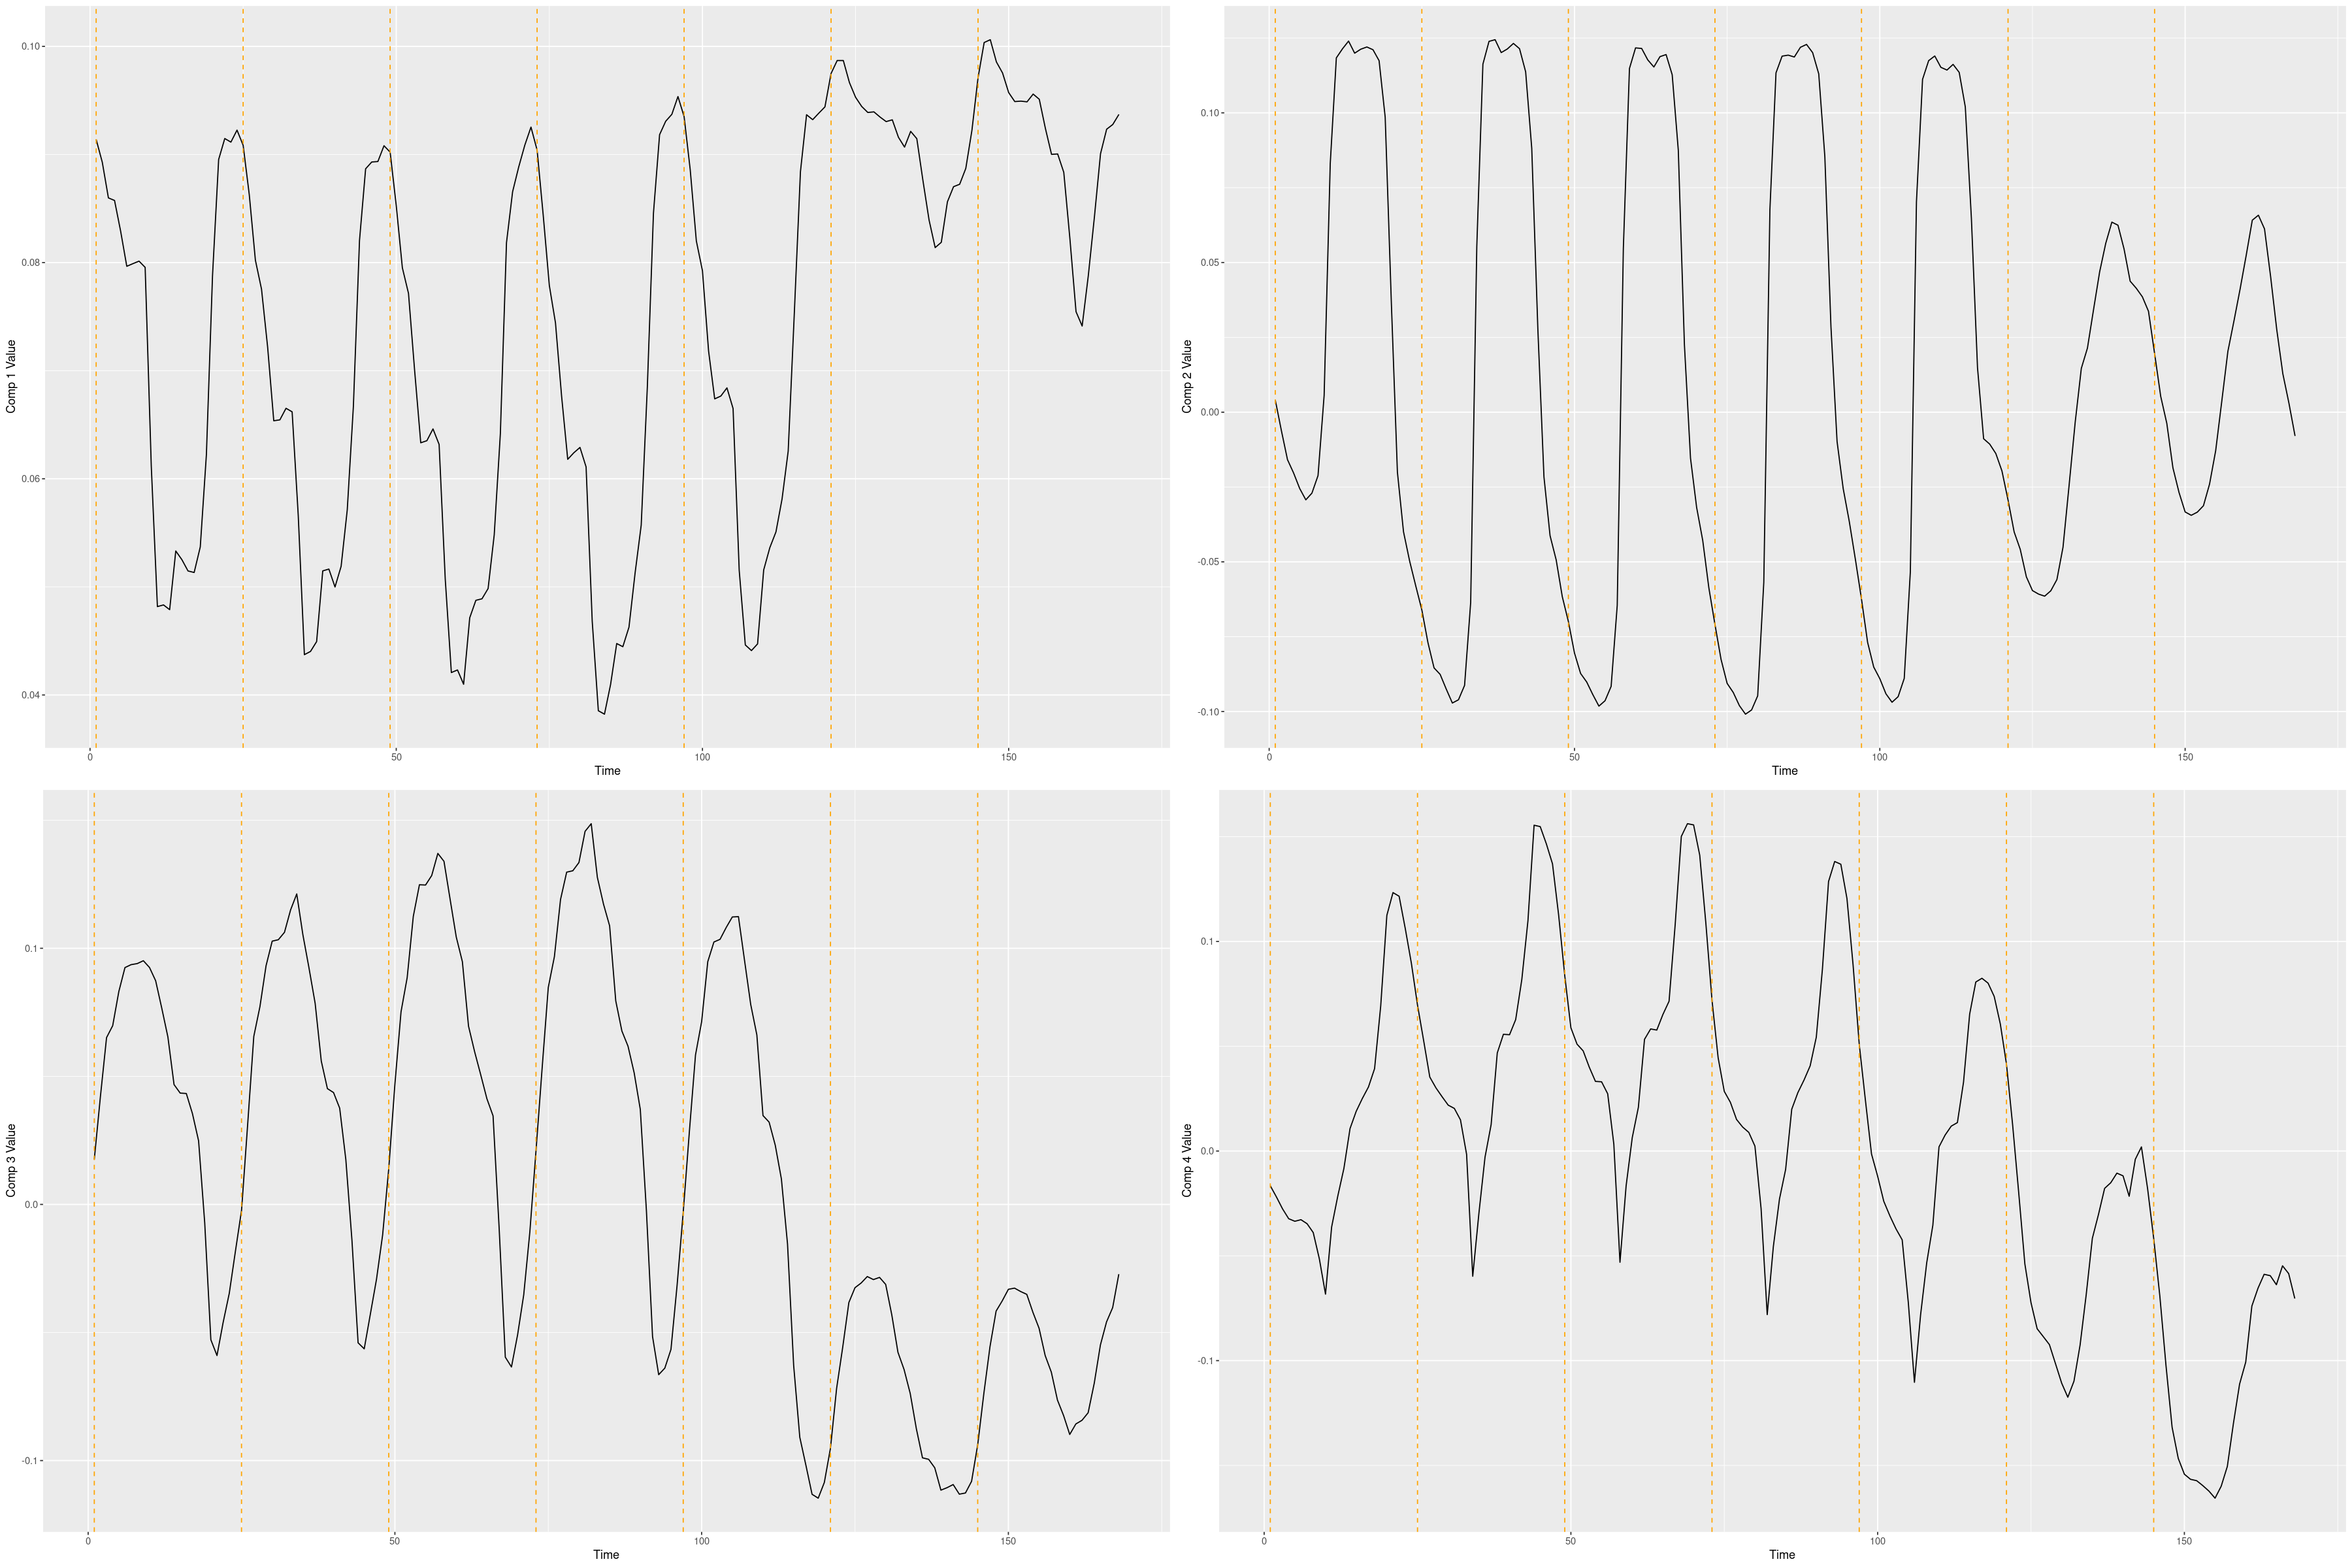

In [19]:
options(repr.plot.width = 30, repr.plot.height = 20)

df = as.data.frame(pca$svd$V)

df$time_range <- 1:ncol(load)

df <- reshape2::melt(df, id.vars = "time_range")


p9 = ggplot(df[df$variable == paste0("V", 1), ], aes(x=time_range, y= value)) + geom_line() +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(x = "Time", y = paste("Comp", 1, "Value"))

p10 = ggplot(df[df$variable == paste0("V", 2), ], aes(x=time_range, y= value)) + geom_line() +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(x = "Time", y = paste("Comp", 2, "Value"))

p11 = ggplot(df[df$variable == paste0("V", 3), ], aes(x=time_range, y= value)) + geom_line() +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(x = "Time", y = paste("Comp", 3, "Value"))

p12 = ggplot(df[df$variable == paste0("V", 4), ], aes(x=time_range, y= value)) + geom_line()  +
     geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
     labs(x = "Time", y = paste("Comp", 4, "Value"))

#p5 = ggplot(df[df$variable == paste0("V", 5), ], aes(x=time_range, y= value)) + geom_line() +
#    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
#    labs(x = "Time", y = paste("Comp", 5, "Value"))



p <- list(p9,p10,p11,p12)
do.call(grid.arrange,p)

The idea of PCA is to describe the variance of a dataset by linar combinations of principal component. That means that the principal components will exhibit important features of the dataset. In our case, plotting the kept principal components (PC1, PC2, PC3 and PC4) will display some familiar patterns, though not identical to parts of our loading graph. That being said, the plot to the left has some similarities with the prominent decrease of loading between $8$h and $10$h and the steep increase between $10$h and $11$h for the weekdays. That this is visible in the first principal component, is understandable as this negative peak is quite dominant in the graph of the mean of loading per day, as seen above. The negative peaks for the week-ends in the principal components might also be important for the predominant dip of loading at saturday and sunday between $15$h and $20$h.

Even though the first principal component should explain almost $40\%$ of the variance, it does not explain why the mean is lower for almost all hours during the weekends, compared to that of the weekdays. That is though more evident from PC2-4, where the loading is much lower during the weekends.

The large periodical peaks in PC3 might explain what might be the redistribution of bikes to hill stations morning of the weekdays, visible through sudden peaks in the loading between $5$h and $8$h. Those are the dominating parts of the hill loading graph, but since only $127$ of the stations are hill station, it is not to evident in the mean for each day. That might result in the PC3 only explaining just above $5\%$ of the variance.

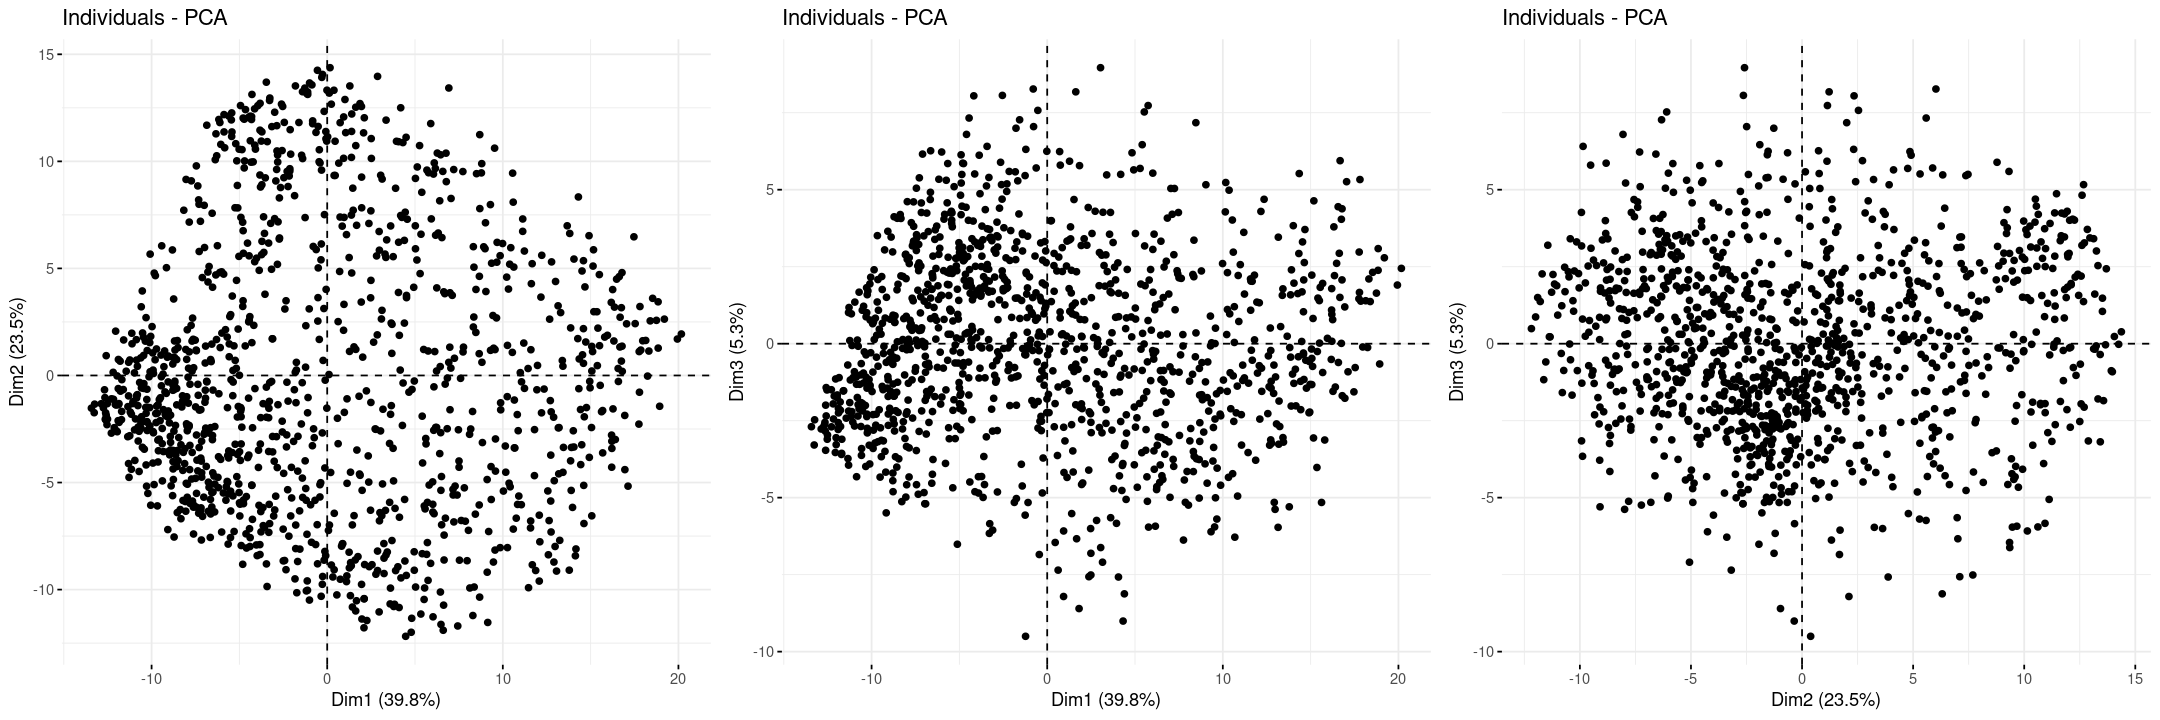

In [20]:
options(repr.plot.width = 18, repr.plot.height = 6)

grid.arrange(
    # Combinations of principal component 1,2,3
    fviz_pca_ind(pca, axes=c(1,2), geom=c("point")),
    fviz_pca_ind(pca, axes=c(1,3), geom=c("point")),
    fviz_pca_ind(pca, axes=c(2,3), geom=c("point")),
    ncol=3
)

Individuals plots can be use to visualize the explained variance of each dimension. In the left plot one can see that the cloud is almost spherical, but it is important to see the range of the first axis is almost twice as large as the one on the second axis. This is in agreement with the fact that the explained variance of the first dimension is $169 \%$ of that of the second one. Since the range of the axes are quite high, one can conclude that theyboth are important for explaining the variance of the original data. Looking at the pots in the middle one sees that the distribution is more elliptical than the one on the left. That indicates that the thrid components is less important for explaining the variance, than the first. The tendencay is also seen in the right plot, though less evident, since the difference in the explained variance is less than between dimension one and three. 

All of the plots seems to have their geometrical centra displaced from the origo of the principal axes. However, there are in all plots some part of the distribution with higher density than the rest, which might balance out the more outlying contributions from individuals resulting in centra of gravity close to origo. The individuals therefore seem to be centered giving an empircal mean of zero, in the PC1-PC2-PC3 space.

## Clustering the initial data

### Kmeans

#### Choice of the best K:

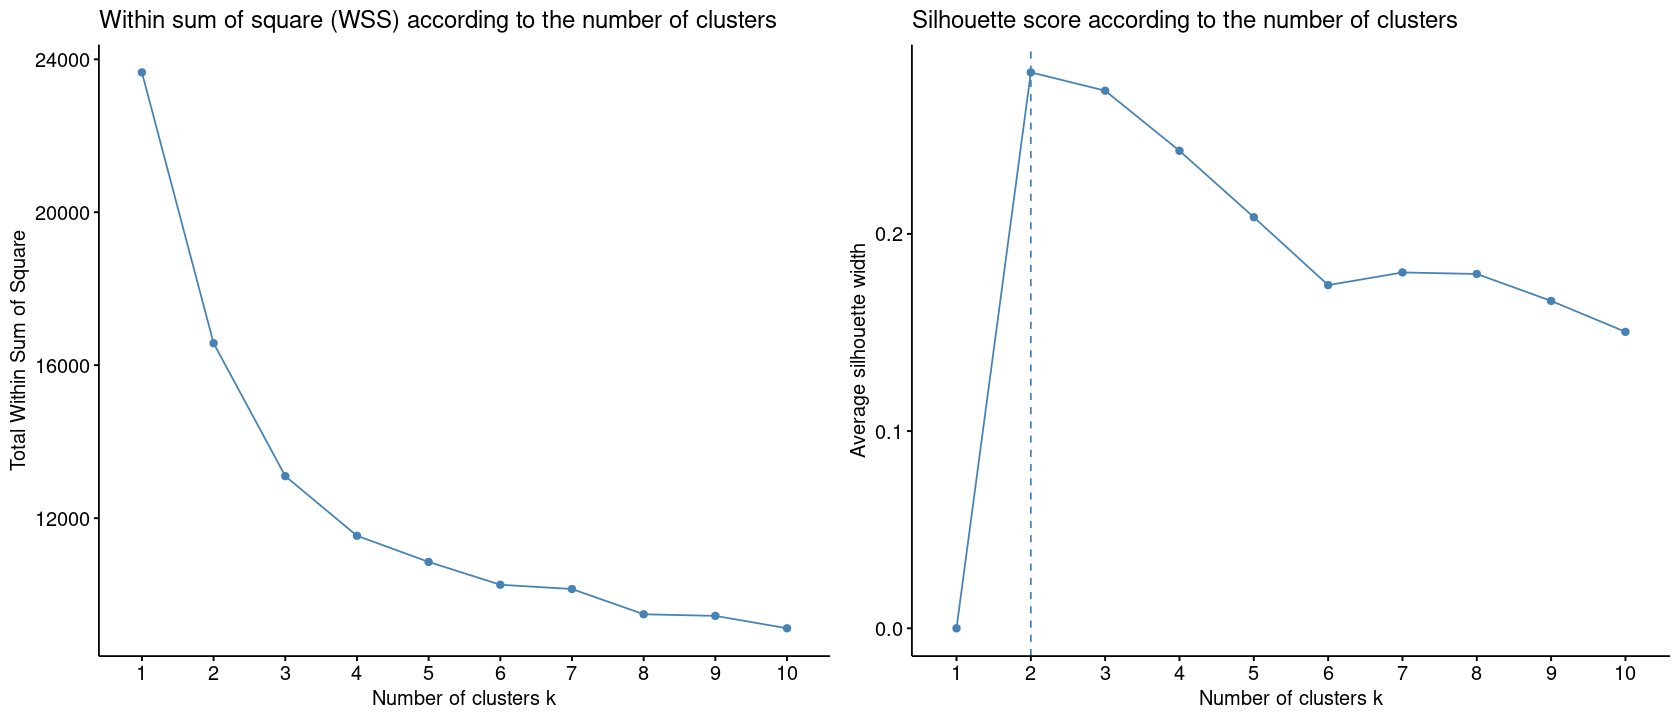

In [21]:
options(repr.plot.width = 14, repr.plot.height = 6)


grid.arrange(
    fviz_nbclust(load, FUNcluster=kmeans, method="wss") +
        ggtitle("Within sum of square (WSS) according to the number of clusters"),

    fviz_nbclust(load, FUNcluster=kmeans, method="silhouette") +
        ggtitle("Silhouette score according to the number of clusters"),
    ncol=2
)

According to the silhouette score, we would choose k = 2, but according to WSS, it is more difficult to determine. We therefore also check the Calinski-Harabasz score and plot the silhouette graphs to illustrate the cluster sizes.


In [22]:
library(factoextra)
library(cluster)
library(fpc)
options(repr.plot.width = 15, repr.plot.height = 12)

# With 2 clusters
reskmeans = kmeans(load, centers=2) 
CH2 = calinhara(load,reskmeans$cluster)
sil = silhouette(reskmeans$cluster, dist(load))
p13 = fviz_silhouette(sil)

# With 3 clusters
reskmeans = kmeans(load, centers=3) 
CH3 = calinhara(load,reskmeans$cluster)
sil = silhouette(reskmeans$cluster, dist(load))
p14 = fviz_silhouette(sil)

# With 4 clusters
reskmeans = kmeans(load, centers=4) 
CH4 = calinhara(load,reskmeans$cluster)
sil = silhouette(reskmeans$cluster, dist(load))
p15 = fviz_silhouette(sil)

# With 5 clusters
reskmeans = kmeans(load, centers=5) 
CH5 = calinhara(load,reskmeans$cluster)
sil = silhouette(reskmeans$cluster, dist(load))
p16 = fviz_silhouette(sil)

grid.arrange(p13,p14,p15, p16,ncol=2)

ERROR: Error in library(fpc): aucun package nommé ‘fpc’ n'est trouvé


As can be seen in the silhouette plots, all clusers are above the average score, which indicates that they are well defined. The differences in silhouette witdh between different clusters are large, but least for $k=2$. The cluster score are not good either, as they are quite far from $si=1$. We see that also there are som points that have been clustered to the wrong cluster, seen from the negative values. $k=2$ is the least affected, as the ratio of points wrongly clustered are the lowest. To conclude, the silhouette plots indicate that we should choose $k=2$, eventhough this is far from perfect clustering. Haven choosen $k=2$, one can se that cluster $2$ is larger than cluster $1$, as $60 \%$ of the indiviuals are placed in this cluster.

Next cell is for plotting the CH-score.

In [ ]:
cal = c(CH2, CH3, CH4, CH5)
k = seq(2, length(cal) + 1, by=1)

options(repr.plot.width = 10, repr.plot.height = 6)

CH_plot <- function(k, cal){
    plot(k, cal, xlab =  "Cluster number k",
    ylab = "CH-score",
    main = "CH Plot",
    col = "blue", type="o")
    abline(v=which(cal==max(cal)) + k[1] - 1, lwd=1, col="red", lty="dashed")
}

CH_plot(k, cal)

CH-score also indicates that we should choose two clusters, $k=2$.

#### Interpretation and vizualisation of the clusters

To be able to interpret the effect of clustering, we plot the clusters in an individual plot.


In [ ]:
reskmeans = kmeans(load, centers=2) 
options(repr.plot.width = 6, repr.plot.height = 6)
p_indplotKmeans <- fviz_cluster(reskmeans, data=load, ellipse.type="norm", labelsize=8, geom=c("point"))
p_indplotKmeans

From the above plot, one can see that the clusters are elliptical, meaning that they have a high intraclass inertia. Since they have overlapping parts, the interclass inertia is low. As the goal of clustering is to minimize the intraclass inertia and maximize the interclass, this results is not to good. One reson for this result, might be that the K-means algorithm converged to a local minima for the intra class inertia, which might be quite different from the global minimum. 

To get a better grasp of what these clusters represent, we do different analysis: We will see how hill and non-hill stations are clustered, if geographical location plays a role and how the mean loading differs between each cluster.

In [ ]:
tbl = table(coord$bonus, reskmeans$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))


With this graph, we can see that almost all stations located on a hill are all in the same cluster, i.e. the first one. The ones not on a hill are almost equally divided between the two clusters. This indicates that there is an important difference between hill stations and non-hill stations. 

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 6)

p17 <- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
  geom_point(aes(color = factor(reskmeans$cluster))) + 
  labs(title = "Clusters of the stations of velib", x = "Longitude", y = "Latitude") +
  theme_minimal()

#dfi$load = load[,6]
#p18 = ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
#        geom_point() +
#        labs(title = paste("Stations loading - Monday 6 h"))

grid.arrange(p17,p7[[1]], ncol=2)

By plotting the clusters by their location, we can see that they correspond more or less to the loading of the stations early in the morning, which we saw is almost identical to that late in the evening. Here cluster $2$ correspond to the stations with high loading. A possible explanation can be that the two clusters differentiate between stations with usually high and low loading. As seen above, hill stations have a lower average loading than stations  not on a hill, which is in agreement to the fact that most hillstations are in cluster $1$, corresponding to low loading. To further test this hypothesis we plot he mean loading for each cluster.


In [ ]:
load1 = load[reskmeans$cluster==1,]
load2 =load[reskmeans$cluster==2,]
meanload1 = colMeans(load1)
meanload2 = colMeans(load2)
dfmean <- as.data.frame(meanload1)
dfmean$meanload2 <- meanload2
time_range = 1:ncol(load)
dfmean$time_range <-time_range


p18 <- ggplot(dfmean,aes(x=time_range)) + geom_line(aes(y=meanload1, color='Mean of load 1')) + 
    geom_line(aes(y=meanload2,color='Mean of load 2')) + 
    labs(title = "Clusters of the stations of velib - Kmeans", x = "Hour", y = "Loading") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    theme_minimal()

p18

By ploting the average loading per hour per cluster, we can clearly separate the clusters. Indeed, the first cluster represents stations which are less used than cluster one. The stations in the cluster one are in average fuller than in the cluster $2$. We can see that the loading averages compensate each other. We can say that the station in the cluster $2$ are those where people leave the bikes during work and the cluster $1$ is full of stations which are near where people lives.


### AHC

We will now use Agglomerative Hierarchical Clustering to cdetect clusters and see how the results compare with the results from Kmeans. First we will look into how many components we should use, and then how the clusters can be interpreted. We use the *average linkage* funtion as our linkage function, to get a good balance between class separation and class diameter.

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

grid.arrange(
    fviz_nbclust(load, FUNcluster=hcut, hc_method = "average", method="wss") + 
        ggtitle("WSS according to nb of clusters"),
    fviz_nbclust(load, FUNcluster=hcut, hc_method = "average", method="silhouette") + 
        ggtitle("silhouette according to nb of clusters"),
    ncol=2
)

The silhouette score suggests three clusters, which is in agreement with the first break in the WSS curve. Plotting the silhouette score to check cluster sizes and average silhouette widths. 

In [ ]:
d = dist(load, method="euclidean")
hclustaverage = hclust(d, method="average")

# Two clusters
reshclust1 = cutree(hclustaverage, 2)
sil = silhouette(reshclust1, dist(load))
p19 = fviz_silhouette(sil)

# Three clusters
reshclust2 = cutree(hclustaverage, 3)
sil = silhouette(reshclust2, dist(load))
p20 = fviz_silhouette(sil)

# Four clusters
reshclust3 = cutree(hclustaverage, 4)
sil = silhouette(reshclust3, dist(load))
p21 = fviz_silhouette(sil)

# Five clusters
reshclust4 = cutree(hclustaverage, 5)
sil = silhouette(reshclust4, dist(load))
p22 = fviz_silhouette(sil)

grid.arrange(p19,p20,p21,p22,ncol=2)

Three clusters give both the highest silhouette score as well as the least varying silhouette widths, tied with $k=2$. Compared to Kmeans, more points seems to be clustered wrongly, as there are more negative silhouette widths. The size of the clusters also seems less even for AHC. We also check the CH-score to see if it also suggests choosing three clusters.

In [ ]:
CH1 = calinhara(load, reshclust1)
CH2 = calinhara(load, reshclust2)
CH3 = calinhara(load, reshclust3)
CH4 = calinhara(load, reshclust4)

cal = c(CH1, CH2, CH3, CH4)
CH_plot(k, cal)

Also the CH-score indicates that we should use three clusters. Since all of the methods points to the same choice, we choose three clusters.

#### Interpretation and vizualisation of the clusters

In [ ]:
p23 <- fviz_dend(hclustaverage, k=3, show_labels=FALSE, rect=TRUE)
p23

From the dendogram we see that the cut is done approximately at height index $h=6$. It also seems that the green and blue cluster are more similar to each other than to the red one, as they connect before they combine with the red one at the very top of the dendogram. On our way to build more intuition for the clusters, we investigate how hill stations are clustered compared to non-hill stations.

In [ ]:
tbl = table(coord$bonus, reshclust2)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

Once again, the stations located on a hill are almost all in the first cluster, further indicating the importance of the "bonus"-parameter for the loading. For the non-hill stations however, less than half belong to cluster $1$, while cluster $2$ and $3$ contains approximately $30 \%$ and $25 \%$ forth each. It is more evenly distributed than in the case of Kmeans, which makes sence, since the non-hill stations outnumber the hill stations and are therefore expected to have more variance and therefore more varying behaviour, which might not be not covered enough by only two clusters. To see the influence of geographical positioning, we plot the clusters by coordinates.


In [ ]:
options(repr.plot.width = 18, repr.plot.height = 6)


p24 <- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
  geom_point(aes(color = factor(reshclust2))) +  
  labs(title = "Clusters of station using AHC", x = "Longitude", y = "Latitude") +
  theme_minimal()


#dfi$load = load[,6]
#p2 = ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
#        geom_point() +
#        labs(title = paste("Stations loading - Monday 6 h"))

#dfi$load = load[,12]
#p3 = ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
#        geom_point() +
#        labs(title = paste("Stations loading - Monday 12 h"))


grid.arrange(p24,p7[[1]],p7[[2]],ncol=3)



From the plot of the clusters by coordinate, we can see that the second cluster is mostly situated around the middle of Paris, especially the city centre just north of the Seine. This might be the busiest part of Paris, and therefore also some of the most popular Velib' Stations. As seen from the difference between six o'clock and twelve o'clock, the stations in cluster $3$ are going from low to high loading during the morning. Thus, cluster $3$ might correspond to the stations people leave their bikes at, going to work. To further test this hypothesis, we plot the mean loading for each clusters per hour.

In [ ]:
load1 = load[reshclust2==1,]
load2 =load[reshclust2==2,]
load3 =load[reshclust3==3,]
meanload1 = colMeans(load1)
meanload2 = colMeans(load2)
meanload3 = colMeans(load3)
dfmean <- as.data.frame(meanload1)
dfmean$meanload2 <- meanload2
dfmean$meanload3 <- meanload3
time_range = 1:ncol(load)
dfmean$time_range <-time_range
p25 <- ggplot(dfmean, aes(x=time_range)) + geom_line(aes(y=meanload1,color='Mean of cluster 1')) + 
    geom_line(aes(y=meanload2,color='Mean of cluster 2')) + 
    geom_line(aes(y=meanload3,color='Mean of cluster 3')) +
    labs(title = "Clusters of the stations of velib - AHC", x = "Hour", y = "Loading") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    theme_minimal()

p25

Cluster $3$ seems to be stations which receive many bikes during the day. The time for the peek seems to correspond with the morning rush to work and the evening rush. The small dip in the middle of the loading graph might correspond to the lunchtime. The means of cluster $1$ and $2$ are greatly reduced in the same time period and may therefore be seen as stations used by people going to work in the morning and returning in the afternoon, such as many of the hill stations. One of the features that seperates cluster $1$ and $2$ is the latter has genereally higher mean loading than the other the former. That can be because they are either unpopular, i.e. has many bikes not used, or they might be so popular that they generally have a high loading and high exchange of bikes. Based on the fact that most of the stations in cluster $2$ are based around the Seine and the main bicycle paths, we conclude with the latter case. The dip for cluster $1$ and $2$ is most likely cause by the enormous peak of loading in cluster $3$, as both of the decreases happens in he same time period.

### GMM

In [ ]:
library(mclust)
#resBICall = mclustBIC(load, G=2:20)
#summary(resBICall)

# --- #

#resBICall = Mclust(load, G=2:20)
#summary(resBICall)

#fviz_mclust(resBICall, what="BIC")


The loading of thecode with so much data takes too long, so we'll only use this method with PCA.


## Clustering after PCA

Since the GMM and AHC are time consuming operations, it would be beneficial if we could reduce the size of the dataset without removing to much of the tendancies. Here might PCA be the solution, as we drastically remove the number of dimensions, by letting the variables be linear combination of a small set of components. Previously in this report, we concluded with four components being a suitable choice for our PCA. We will now use Kmeans, AHC and GMM on the PCA reduced dataset, and compare with our earlier results, to see what effect PCA has on clustering.


## Kmeans

### Choosing k:

In [ ]:
pca_data <- pca$ind$coord

options(repr.plot.width = 14, repr.plot.height = 6)

grid.arrange(
    fviz_nbclust(pca_data, FUNcluster=kmeans, method="wss") +
        ggtitle("Within sum of square (WSS) according to the number of clusters"),

    fviz_nbclust(pca_data, FUNcluster=kmeans, method="silhouette") +
        ggtitle("Silhouette score according to the number of clusters"),
    ncol=2
)

Based on the silhouette score alone, we should choose $k=3$ clusters. The WSS again difficult to read, but we ay choose $k \in [3,5]$. To see the sizes of the clusters and the widths of the silhouette, we display the silhouette plots.

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)

# With 2 clusters
reskmeansp = kmeans(pca_data, centers=2) 
CH1 = calinhara(pca_data, reskmeansp$cluster)
sil = silhouette(reskmeansp$cluster, dist(pca_data))
p26 = fviz_silhouette(sil)

# With 3 clusters
reskmeansp = kmeans(pca_data, centers=3) 
CH2 = calinhara(pca_data, reskmeansp$cluster)
sil = silhouette(reskmeansp$cluster, dist(pca_data))
p27 = fviz_silhouette(sil)

# With 4 clusters
reskmeansp = kmeans(pca_data, centers=4) 
CH3 = calinhara(pca_data, reskmeansp$cluster)
sil = silhouette(reskmeansp$cluster, dist(pca_data))
p28 = fviz_silhouette(sil)

# With 5 clusters
reskmeansp = kmeans(pca_data, centers=5) 
CH4 = calinhara(pca_data, reskmeansp$cluster)
sil = silhouette(reskmeansp$cluster, dist(pca_data))
p29 = fviz_silhouette(sil)

grid.arrange(p26,p27,p28, p29,ncol=2)

Three clusters give the highest average silhouette width of the ones plotted here. Generally the average silhouette widths are larger than in the case of Kmeans without PCA. As for the difference in widths, $k=2$ has the lowest, while $k=3$ has the next least varying silhouette widths. There are some wrongly clustered values in the case of three clusters, but they do again constitute only an imperceptile part of the data. Looking at the cluster sizes, we see that for $k=3$, we have a ratio of almost $5:4:3$, meaning that there is no dominating cluster. Plotting the CH-score to conclude if we should choose two or three clusters.

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

cal = c(CH1, CH2, CH3, CH4)
CH_plot(k, cal)

The CH-score is highest for $k=3$, which is in agreement with both the silhouette score and the WSS. We therefore choose to have three clusters. 

#### Interpretation and vizualisation of the clusters

We will now look deeper into the interpretation of having three clusters for the Kmeans. We do this through a individual plot, a map of the coordinates of the clusters, as well as the mean loading for all of the clusters.

In [ ]:
reskmeans2 = kmeans(pca_data, centers=3) 

options(repr.plot.width = 14, repr.plot.height = 8)
p_indplotKmeansPCA <- fviz_cluster(reskmeans2, data=pca_data, ellipse.type="norm", labelsize=8, geom=c("point"))
p_indplotKmeansPCA

Here there are a large degree of overlap between the clusters, so much that cluster $1$ is also almost totally enclosed in cluster $3$. This means that the interclass inertia between the clases are low. Based on the wide elliptical clusters, one can conclude that the intraclass inertia is high. This might again be caused by the Kmeans algorithm having converged to a local minimum.

The reduction of variance, and therefore total inertia, from the PCA is the case of some differences compared to the Kmeans on non-PCA data. First of all, it is worh mentioning that dimension $1$ and $2$ do not describe as much of the variance than for Kmeans without PCA. Here both dimension $1$ and $2$ describe $25 \%$ each, though the range of dimension $1$ is more than the double of dimension $2$. There are also more outliers outside the established cluster ellipses. That might be because of the ellipses having a lower intraclass inertia than for Kmeans without PCA. This is visible from the axes, ranging from $-3$ to $4$ and $-2$ to $2$, compared to the original individual plot, which had axes in the range $[-15, 20]$ and $[-15, 15]$. That both the interclass and intraclass inertia decreases is due to fact that less than $73\%$ of the total inertia of the original dataset is present in the PCA reduced data. 

Now we will look at how hill stations and non-hill stations are clustered.

In [ ]:
tbl = table(coord$bonus, reskmeans2$cluster)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2:4))

Once more, almost all the stations located on a hill are all in the same cluster. The non-hill stations are more evenly distributed than before, with an approximate ratio: $8:5:7$. The "bonus"-parameter does then have an important effect also after PCA.

Next, we look at the geographical distribution of the clusters.

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 8)

p30 <- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
  geom_point(aes(color = factor(reskmeans2$cluster))) + 
  labs(title = "Clusters of the stations of velib with pca", x = "Longitude", y = "Latitude") +
  theme_minimal()

#dfi$load = load[,6]
#p2 <- ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
#        geom_point() +
#        labs(title = paste("Stations loading - Monday 6 h"))

#p2 <- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
#  geom_point(aes(color = factor(reshclust2))) +  
#  labs(title = "Clusters of stations using AHC without PCA", x = "Longitude", y = "Latitude") +
#  theme_minimal()

#p3<- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
#  geom_point(aes(color = factor(reskmeans$cluster))) + 
#  labs(title = "Clusters of the stations of velib without pca", x = "Longitude", y = "Latitude") +
#  theme_minimal()


grid.arrange(p30,p24,p17,ncol=3)


We can see that using three clusters in Kmeans on the PCA reduced data gives approximately the same cluster as using AHC on the orignal data set. Most of the individuals belonging to cluster $2$ in the plot from Kmeans wihtout PCA are though still clustered together in the left plot, just as cluster $3$. To compare wherever the loading is similar to that of AHC, we plot the mean of each cluster per hour.

In [ ]:
load1 = load[reskmeans2$cluster==1,]
load2 = load[reskmeans2$cluster==2,]
load3 = load[reskmeans2$cluster==3,]
meanload1 = colMeans(load1)
meanload2 = colMeans(load2)
meanload3 = colMeans(load3)

dfmean <- as.data.frame(meanload1)
dfmean$meanload2 <- meanload2
dfmean$meanload3 <- meanload3

time_range = 1:ncol(load)
dfmean$time_range <-time_range

options(repr.plot.width = 25, repr.plot.height = 12)

p31 <- ggplot(dfmean,aes(x=time_range)) + geom_line(aes(y=meanload1, color='Mean of cluster 1')) + 
    geom_line(aes(y=meanload2,color='Mean of cluster 2')) +
    geom_line(aes(y=meanload3,color='Mean of cluster 3')) +
    labs(title = "Clusters of the stations of velib - Kmeans with PCA", x = "Hour", y = "Loading") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    theme_minimal()

grid.arrange(p31,p25, ncol=1)


We se that from the plots above that the mean loading per hour for cluster $2$ is more or less identical for Kmeans with PCA and AHC without PCA. Cluster $3$ is the one with the largest difference between the plots. Instead of displaying the peak during the work day, it has a dip in the same time period. This might be explained by the mean of clster $1$ having a slightly increased mean in the same time period, compared to the plot for AHC. That means that some of the stations which gain bikes during the morning rush are moved from cluster $3$ to cluster $1$. The effect of this is that cluster $3$ might be looked interpreted as stations that have high loading, except for the time period corrsponding to the working day, while cluster $1$ can be looked at as the stations usually having low loading, but even less in between eight o'clock and four o'clock. Another difference is that the mean loading of cluster $3$ increases drastically after four o'clock, when people are heading home after work, instead of decreasing like in the case for AHC. By comparing the silhouette plots for AHC and Kmeans with PCA, we can see that the AHC has a higher ratio of data wrongly clustered datapoints, especially in cluster $1$ and $3$. These misplacements might help to explain the large disagreement between the mean loading of these clusters. 

Moving on to AHC on the dimensional reduced data.


### AHC

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

grid.arrange(
    fviz_nbclust(pca_data, FUNcluster=hcut, hc_method = "average", method="wss") + ggtitle("WSS according to nb of clusters"),
    fviz_nbclust(pca_data, FUNcluster=hcut, hc_method = "average", method="silhouette") + ggtitle("silhouette according to nb of clusters"),
    ncol=2
)

The average silhouette score suggest that we should use as much as six clusters, though he increase from $k=3,4$ is not too large. Again, there are no evident "elbow" in the WSS curve, but the number of clusters seem to be in the range $[3,5]$. We do also plot the silhouette and CH-score to get a better insight into how many clusters we should choose.

In [ ]:
d = dist(pca_data, method="euclidean")
hclustaverage = hclust(d, method="average")

# Two clusters
reshclust1 = cutree(hclustaverage, 2)
CH1 = calinhara(pca_data,reshclust1)
sil = silhouette(reshclust1, dist(pca_data))
p32 = fviz_silhouette(sil)

# Three clusters
reshclust2 = cutree(hclustaverage, 3)
CH2 = calinhara(pca_data, reshclust2)
sil = silhouette(reshclust2, dist(pca_data))
p33 = fviz_silhouette(sil)

# Four clusters
reshclust3 = cutree(hclustaverage, 4)
CH3 = calinhara(pca_data, reshclust3)
sil = silhouette(reshclust3, dist(pca_data))
p34 = fviz_silhouette(sil)

# Six clusters
reshclust4 = cutree(hclustaverage, 6)
CH4 = calinhara(pca_data, reshclust4)
sil = silhouette(reshclust4, dist(pca_data))
p35 = fviz_silhouette(sil)

grid.arrange(p32,p33,p34,p35,ncol=2)

Even though six clusters give the best silhouette score, it has highly varying silhouette widths, and cluster five are barely well defined. We see that both three and four clusters are close when it comes to the silhouette score, and they have both only well defined silhouettes. Of the choice between $k=3$ and $k=4$, the latter is the one with the least varying silhouette widths. They to both have wrongly clustered detapoints, especially the second cluster of $k=3$, where a large ratio of the datapoints have a negative silhouette score. We now plot the CH-scores.

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
k = c(2,3,4,6)
cal = c(CH1, CH2, CH3, CH4)
CH_plot(k, cal)

The CH-curve strongly suggests that we should use four clusters. This is also a good choice for the WSS curve and the silhouette score. We therefore choose four clusters.

In [ ]:
p36 <- fviz_dend(hclustaverage, k=4, show_labels=FALSE, rect=TRUE)
p36

The dendogram indicates that cluster $1$ and $2$ are most similar to each other, and that the same can be said for cluster $3$ and $4$. The cut is not done on height index of approximately $h=14$, which is higher than for ACH on the orignal dataset.

In [ ]:
tbl = table(coord$bonus, reshclust3)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2, 3, 5, 6))


Still the vast majority of the hill stations are in the same cluster. That indicate even more than before that the bonus parameter has an essential influence on the loading cycle. For four clusters, the non-hill station are even more evenly distributed than for the previous cases. Now we will look at distribution of the clusters based on coordinates. 

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 8)

p37 <- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
  geom_point(aes(color = factor(reshclust3))) + 
  labs(title = "Clusters of the stations of velib - ACH with pca", x = "Longitude", y = "Latitude") +
  theme_minimal()

#dfi$load = load[,12]
#p2 <- ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
#        geom_point() +
#        labs(title = paste("Stations loading - Monday 12 h"))

#dfi$load = load[,6]
#p3 <- ggplot(dfi, aes(x=longitude, y=latitude, color=load)) + 
#        geom_point() +
#        labs(title = paste("Stations loading - Monday 6 h"))

#p4<- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
#  geom_point(aes(color = factor(reshclust1))) + 
#  labs(title = "Clusters of the stations of velib without pca", x = "Longitude", y = "Latitude") +
#  theme_minimal()


grid.arrange(p37,p30,p24,p17,ncol=4)


On the leftmost map we see that it is the areas adjacent to the Seine and the City Center that are further divided with using four clusters. 

In [ ]:
load1 = load[reshclust3==1,]
load2 =load[reshclust3==2,]
load3 =load[reshclust3==3,]
load4 =load[reshclust3==4,]
meanload1 = colMeans(load1)
meanload2 = colMeans(load2)
meanload3 = colMeans(load3)
meanload4 = colMeans(load4)
dfmean <- as.data.frame(meanload1)
dfmean$meanload2 <- meanload2
dfmean$meanload3 <- meanload3
dfmean$meanload4 <- meanload4
time_range = 1:ncol(load)
dfmean$time_range <-time_range

options(repr.plot.width = 24, repr.plot.height = 10)
p38 <- ggplot(dfmean,aes(x=time_range)) + geom_line(aes(y=meanload1, color='Mean of cluster 1')) + 
    geom_line(aes(y=meanload2, color='Mean of cluster 2')) + 
    geom_line(aes(y=meanload3, color='Mean of cluster 3')) + 
    geom_line(aes(y=meanload4, color='Mean of cluster 4')) + 
    labs(title = "Clusters of the stations of velib - ACH with PCA", x = "Hour", y = "Loading") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    theme_minimal()

p38
p10

Cluster $3$ seems to consist of the stations receiving many bikes by people going to work, similar to that of ACH without PCA and Kmeans with PCA. Its mean loading has strong similarities to principal component $2$, both in its positive and negative peaks. The shape is also similar in the weekend, but with a lower amplitude compared to the weekends, than in PC2. This similarity indicates that cluster $3$ is a superposition of principal components dominated by PC2. Furthermore, cluster $2$ has a mean loading profile almost mirrored to that of cluster $3$. This symbyotic relationship, might balance each other out as resulting in an average loading corresponding to the equilibrium of the oscillations, approximately at $0.43$, slightly above the average loading per hour of the original dataframe. We can therefore interpret cluster $2$ as popular stations for picking up bikes for going to work.

Cluster $4$ consists of stations with general high loading. The mean does fluctuate, but with a small amplitude. These stations might either correspond to unpopular stations having high loading, or very popular stations with high exchange of bikes. Cluster $1$ on the other hand, has a low mean loading for all days of the week. The peaks are right before rush hour in the morning, where it suddently dips. The mean load profile matches greatly that of the mean of hill stations for each day per hour, even though the hill stations only constitute $25\%$ of the individuals in this cluster. The *average linkage function* has a tendency to produce classes of close variance. Cluster $1$ must therefore consist of the hill stations and non-hill stations displaying the same behaviour as the hill stations.

The mean loading for all four clusters exhibit peaks either negative or positive at the rush hour in the morning and in the evening. Even though it might seem strange that all the clusters behave like that, it makes sense as the most important principle component, explaining as much as $40\%$ of the variance, exhibit this exact behaviour. 




### GMM 


In [ ]:
library(mclust)
resBICall = mclustBIC(pca_data, G=2:7)
summary(resBICall)

# --- #

resBICall = Mclust(pca_data, G=2:7)
summary(resBICall)

Calculation the *Bayesian Information Criterion* (BIC) for the PCA-reduced data, the optimal number of cluster in the range two to seven is seven, when using with a VVE model. In the VVE model the clusters are ellipsoids, due to varying shape, with unequal volume but equal orientation. The use of VVE with six components and VEV with seven components are not to perfomrin to bad either. To see how these model compare to the rest of the models, we plot the BIC for alle models with $k\in [2,7]$. 

In [ ]:
options(repr.plot.width = 24, repr.plot.height = 10)
p39 <- fviz_mclust(resBICall, what="BIC")
p39

We see that the BIC is generally higher for incresing number of components. One can also observe that the BIC of VVE incereases considerable from five to six componets, but almost nothing from six to seven, in accordance to the talbe above. That means that if one choose six components VVE, overfitting is less likely. For the VEV and VVV, however, the graph is relatively flat between fourth and seventh component, and quite close the the maximum of the VVE. At $k=4$ most of the graphs have jump, and being relatively flat after. Therefore to avoid complexity, one can choose four components. Lets compare with silhouette plots and CH-scores.

In [ ]:
options(repr.plot.width = 24, repr.plot.height = 10)

gmm_mod1 <- Mclust(data = pca_data, G=3, nstart=10)
CH1 = calinhara(pca_data, gmm_mod1$classification)
sil = silhouette(gmm_mod1$classification, dist(pca_data))
p40 <- fviz_silhouette(sil)

gmm_mod2 <- Mclust(data = pca_data, G=4, nstart=10)
CH2 = calinhara(pca_data, gmm_mod2$classification)
sil = silhouette(gmm_mod2$classification, dist(pca_data))
p41 <- fviz_silhouette(sil)

gmm_mod3 <- Mclust(data = pca_data, G=5, nstart=10)
CH3 = calinhara(pca_data, gmm_mod3$classification)
sil = silhouette(gmm_mod3$classification, dist(pca_data))
p42 <- fviz_silhouette(sil)

gmm_mod4 <- Mclust(data = pca_data, G=6, nstart=10)
CH4 = calinhara(pca_data, gmm_mod4$classification)
sil = silhouette(gmm_mod4$classification, dist(pca_data))
p43 <- fviz_silhouette(sil)

gmm_mod5 <- Mclust(data = pca_data, G=7, nstart=10)
CH5 = calinhara(pca_data, gmm_mod5$classification)
sil = silhouette(gmm_mod5$classification, dist(pca_data))
p44 <- fviz_silhouette(sil)

grid.arrange(p40,p41,p42,p43, p44,ncol=3)

From the silhouette score, five clusters is the best performing. However, one of the five clusters is bearely well defined, and most of it is wrongly asigned to the cluster, resulting in an negative silhouette width. The plot for four clusters is the one with the least varying silhouette width, and its score is close to that of five clusters, equal to that of six clusters. Based on the silhouette scores, we should choose four clusters. We compare with the CH-score.

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
k = seq(3, 7, by=1)
cal = c(CH1, CH2, CH3, CH4, CH5)
CH_plot(k, cal)

From the CH-score, six clusters is the optimal. As one of the disadvantages of the GMM is that it has a tendency to overfit. To better be able to compare the clustering methods used in this notebook, as well as avoiding overfitting issues, we choose to use four components only. It is not the best number of clusters based on the test results combined, but it is fairly well performin in all of them. Lets see how the clusters are looking in first and second dimensional space.

In [ ]:
paste("Method used for GMM: ", gmm_mod2$modelName)

options(repr.plot.width = 7, repr.plot.height = 7)

p45 <- fviz_cluster(object=gmm_mod2, data=pca_data, show.clust.cent=TRUE, ellipse=TRUE)
print(p45)
options(repr.plot.width = 10, repr.plot.height = 6)

We see that for cluster $1, 2$ an $3$ there is little overlap. Furthermore, since they are almost "piled" vertically, we see that dimension two is effective at seperating the cluster $1-3$. They seem to have low inter-class inertia. As for cluster $4$, it is all over the place, indicating that it has high intraclass inertia. We observe that the clusters have quite differnt volume, shape and orientation, in great occordance to the covariance matrix being $VVV$.

We now see how the hill stations are clustered.

In [ ]:
tbl = table(coord$bonus, gmm_mod2$classification)
print(tbl)

options(repr.plot.width = 9, repr.plot.height = 6)
mosaicplot(tbl, color=c(2, 3, 5, 6))

In contrast to the previous methods we have investigated, GMM does not assign the vast majority into a single cluster. Here half of the hill stations are in cluster $1$, while cluster $40\%$ are in cluster $4$. No hill stations are assigned to cluster $2$. For the non-hill stations, cluster $1,2$ and $4$ has approximately the same percentage, collectively representing half of the non-hill stations.

To see the geographically distribution of the clusters, we plot the clusters by coordinates.

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6)
p46 <- ggplot(load, aes(x = coord$longitude, y = coord$latitude)) +
  geom_point(aes(color = factor(gmm_mod2$classification))) + 
  labs(title = "Clusters of the stations of velib - GMM with pca", x = "Longitude", y = "Latitude") +
  theme_minimal()

grid.arrange(p46, p37, ncol=2)

There are some dissimilarities between the clustering of GMM and ACH using PCA, especially north of the Seine. However the city centre stations are almost identically assigned to the same cluster, which is the same case for the area along the Seine. To see how those differences are representated in the loading, we plot the mean loading of all stations per hour.

In [ ]:
#nc_gmm = 4
#time_range = 1:ncol(load)

#options(repr.plot.width = 28, repr.plot.height =12)

#for (i in 1:nc_gmm){
#    loadgmm <- load[gmm_mod2$classification==i,]
#    plot(time_range,colMeans(loadgmm), type = "l")}

In [ ]:
load1 = load[gmm_mod2$classification==1,]
load2 = load[gmm_mod2$classification==2,]
load3 = load[gmm_mod2$classification==3,]
load4 = load[gmm_mod2$classification==4,]

#load5 = load[gmm_mod2$classification==5,]
#load6 = load[gmm_mod2$classification==6,]
#load7 = load[gmm_mod2$classification==7,]

meanload1 = colMeans(load1)
meanload2 = colMeans(load2)
meanload3 = colMeans(load3)
meanload4 = colMeans(load4)

#meanload5 = colMeans(load5)
#meanload6 = colMeans(load6)
#meanload7 = colMeans(load7)

dfmean <- as.data.frame(meanload1)
dfmean$meanload2 <- meanload2
dfmean$meanload3 <- meanload3
dfmean$meanload4 <- meanload4

#dfmean$meanload5 <- meanload5
#dfmean$meanload6 <- meanload6
#dfmean$meanload7 <- meanload7
time_range = 1:ncol(load)
dfmean$time_range <-time_range


In [ ]:
options(repr.plot.width = 20, repr.plot.height =10)

p47 <- ggplot(dfmean,aes(x=time_range)) + geom_line(aes(y=meanload1,color='Mean of cluster 1')) + 
    geom_line(aes(y=meanload2,color='Mean of cluster 2')) +
    geom_line(aes(y=meanload3,color='Mean of cluster 3')) +
    geom_line(aes(y=meanload4,color='Mean of cluster 4')) +
    labs(title = "Clusters of the stations of velib - GMM with PCA", x = "Hour", y = "Loading") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
  theme_minimal()
p47
p38

We see that we have similar symbiotic behaviour between cluster $1$ and $2$. They differ however from the mean loading profile of AHC, as the decrease of cluster $1$ is less than the increase of cluster $2$. This imbalance influence the profile of cluster $3$, which for the GMM has dips in the same time periode as the decrease/increase in clutster $1$ and $2$. Cluster $3$ has peaks and dips at the exact same time as cluster $1$, just with a higher loading and less drastical changes. Therefore the stations in this cluster may correspond to the less popular stations used for going to work, whereas stations in cluster $1$ are more popular. Cluster $4$ has some similarities across the methodes, but with much less loading in GMM than ACH with PCA.

## Comparison

Earlier in the report, we have discussed some similarities between the results, but in this section we will elaobrate on the differences further. We will compare both the methods and the effect of PCA.

### Comparing methods without PCA

#### Kmeans vs ACH

In [ ]:
grid.arrange(
    fviz_pca(pca, col.ind=as.factor(reskmeans$cluster), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with Kmeans without PCA"),
    fviz_pca(pca, col.ind=as.factor(reshclust2), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with AHC without PCA"),
    ncol=2
)

First of all we have used two clusters on Kmeans and three on AHC, so the indiviuals cloud look quite different. However, most of cluster $1$ in Kmeans belong to cluster $2$. It seems that the stations in this cluster are quite similar, as they are not split when adding a new cluster. Moreover, all the clusters are well separated in first and second dimensional space. For Kmeans, PC1 works as a good separator, as the clouds are almost separated by a vertical line. The same divider can be used to separate the second second cluster from the others, while cluster $1$ and $3$ are well divided by PC2.

In Kmeans, cluster $1$ seems overall to be well correlated to the variables, as they share the same part of the dim $1-2$-subspace. Cluster $2$ however, is on the opposite side of the circle of correlation, indicating that it is more negatively coordinated to the same variables. Since the clouds span over such a large area, they there are of course individuals not correlated with certain variables at all, globally the clusters have amajority parallell or antiparallel to the variables. A similar tendancy can be found for the ACH data as well, but here cluster $1$ is anticorrelated with the top third of the variables, while cluster $3$ with thte lower third of the variables.

To see how well the clustering methods overlap, we draw a confusion matrix.

In [ ]:
library(cvms)
library(fossil)
table('Kmeans'= reskmeans$cluster, 'ACH'= reshclust2)

# With the confusion matrix
conf_mat = confusion_matrix(targets=reskmeans$cluster, predictions=reshclust2)
plot_confusion_matrix(conf_mat)
paste("Adjusted rand index: ", round(adj.rand.index(reskmeans$cluster, reshclust2),4))

We see that the rand index is fairly high, indicating that the clusters have a high degree of similarities. From the contingency table one can observe that cluster $1$ and $2$ have opproximately $40 \%$ of the data of each, and that most of cluster $2$ for ACH are equal to cluster $2$ of Kmeans. This contributes to the high rand index.

To conclude, ACH prefers a dimension higher then Kmeans for this dataset, and it has a prominetn higher runtime. The clusters have a high degree of similary since they almost share an identical cluster. Both Kmeans and ACH assigns all the hill stations to the same cluster.

### Comparing methods on PCA

Moving on the the PCA reduced dataset, we will compare all of the three methods done.
#### Kmeans vs ACH vs GMM

In [ ]:
grid.arrange(
    fviz_pca(pca, col.ind=as.factor(reskmeans2$cluster), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with Kmeans on PCA"),
    fviz_pca(pca, col.ind=as.factor(reshclust3), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with AHC on PCA"),
    fviz_pca(pca, col.ind=as.factor(gmm_mod2$classification), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with GMM on PCA"),
    ncol=3
)

Cluster $2$ is almost identical to cluster $3$ in AHC, equal to the top of cluster $4$ in GMM. The majority of cluster $3$ is found in the same clusternumber in GMM. but the bottom belongs to cluster $1$. Here ACH divides the same stations into two clusters. The furthermost left individuals are clustered together for all three methods. This part is between a place between not related to negatively related with the variables. The rightmost cluster seems to be well explained by the majority of the variables.  The top cluster share features with the topmost variables and opposite features to the lower variables. 

We will now look at the rand indexes and contingency tables.

#### Kmeans and AHC

In [ ]:
table('Kmean'=reskmeans2$cluster, 'AHC'=reshclust3)

paste("Adjusted rand index: ", round(adj.rand.index(reskmeans2$cluster, reshclust3),4))
conf_mat = confusion_matrix(targets = reskmeans2$cluster, predictions = reshclust3)
plot_confusion_matrix(conf_mat)

From the adjusted randindex the clusters from Kmeans and AHC on PCA reduced data have less similarities than for the same methods on the original dataset. This is also visible in the contingecy table where the only clusters sharing a wast number of stations are cluster $1$ in both mehods, where almsot $40\%$ of the dataset belong to. Except from this cluster, the data seems to be distributed more evenly for the AHC, where three of them consist around $20\%$ of the data.

#### Kmean and GMM

In [ ]:
table('Kmean'=reskmeans2$cluster, 'GMM'= gmm_mod2$classification)

paste("Adjusted rand index: ", round(adj.rand.index(reskmeans2$cluster, gmm_mod2$classification),4))
conf_mat = confusion_matrix(targets = reskmeans2$cluster, predictions = gmm_mod2$classification)
plot_confusion_matrix(conf_mat)

The similarity between the Kmeans and GMM are even lower than for the previous combinations we have tried so far.  The highest shared percentage of data is just below $30 \%$, with the next highest as low as under $20\%$. The sizes of the clusters are more varying for Kmeans than for GMM.

In [ ]:
table('AHC'= reshclust3, 'GMM'=gmm_mod2$classification)

paste("Adjusted rand index: ", round(adj.rand.index(reshclust3, gmm_mod2$classification),4))
conf_mat = confusion_matrix(targets = reshclust3, predictions = gmm_mod2$classification)
plot_confusion_matrix(conf_mat)

Of the methods we have compared AHC and GMM are those who have the least similarities based on the adjusted rand index, which is quite low. This is also visible in the contingency table, where no clusters share more than $20\%$ of the data. The sizes of the clusters are though similar, except from cluster $3$ in AHC and cluster $1$ in GMM, which are both larger. 

#### Conclusion on clustering of PCA reduced data

Of the methods we have tested on the dimensional reduced data, there were most similarties between Kmeans and AHC, even though they had different numbers of clusters. Even with the same number of clusters AHC and GMM had the least similarity. All comparisons including GMM had in generel less similarity than with Kmeans and AHC. This might be because of choice of four clusters where not the optimal choise, and it included wrongly assigned datpoints. The reason for this might be because the in the GMM the usual EM algorithm converges, but not necessarily to the global maximim of the log-likelihood. Therefore, it could have been better to find more clever ways to initialize the EM algorithm, which may influence the results of the GMM.

### Comparing methods on original data set and PCA reduced data
#### Kmeans

In [ ]:
grid.arrange(
    fviz_pca(pca, col.ind=as.factor(reskmeans$cluster), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with Kmeans without PCA"),
    fviz_pca(pca, col.ind=as.factor(reskmeans2$cluster), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with Kmeans on PCA"),
    ncol=2
)

Cluster $2$ on the original data look quite equal to cluster $3$ in the dimensional reduced data. For the latter, the  dimension one is noe as effective at separating the clusters. Cluster $1$ in the left plot is divided between cluster $1$ and $3$ in the right plot.

In [ ]:
table('Without PCA'= reskmeans$cluster, 'With PCA'= reskmeans2$cluster)

paste("Adjusted rand index: ", round(adj.rand.index(reskmeans$cluster, reskmeans2$cluster),4))
conf_mat = confusion_matrix(targets = reskmeans$cluster, predictions = reskmeans2$cluster)
plot_confusion_matrix(conf_mat)

The rigde index is quite low. Cluster $1$ in both cases shares the most data, just before cluster $2$ in the original data and cluster $3$ in the reduced data.

#### AHC

In [ ]:
grid.arrange(
    fviz_pca(pca, col.ind=as.factor(reshclust2), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with AHC without PCA"),
    fviz_pca(pca, col.ind=as.factor(reshclust3), geom=c("point"), axes=c(1,2)) + 
    ggtitle("Cluster with AHC on PCA"),
    ncol=2
)

Seems more similar then for Kmeans, as the clusters are almost identical, except for the rightmost cluster in the original data which is divided into to in PCA reduced data.

In [ ]:
table('Without PCA'= reshclust2, 'With PCA'= reshclust3)

paste("Adjusted rand index: ", round(adj.rand.index(reshclust2, reshclust3),4))
conf_mat = confusion_matrix(targets = reshclust2, predictions = reshclust3)
plot_confusion_matrix(conf_mat)

The adjusted ridge index is equal to ne, indicating that the clusters are similar. Also the contingency table displays that except from the division of clutser $2$ for the results on the original data set, all the datapoints are assigned identically in both cases.

#### Conclusion on comparision between results on original dataset and the dimensional reduced data

While there are low similarity between Kmeans on the two datasets, AHC has a perfect adjusted rand index. That indicats that doing AHC on the PCA reduced data gives almost the same result as doing it on the original dataset, but with a one more component. Then for AHC, it would be preferable to do it on the PCA reuced data, as it is more efficient.

## MCA


### First dataframe


In [54]:
loadMCA1 <- load

# Adding weekdays as categories
week <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
d = 1

for (i in seq(1, dim(load)[2], by=24)){
    loadMCA1[, week[d]] = rowMeans(loadMCA1[seq(i, i+23, by=1)])
    d <- d + 1   
    }

For the first dataframe, we wanted to see if there was a link between the different days of the week. We decided to take the mean of each day for each station.

In [58]:
# Dividing day into four categories: 
#   0  - 5: Night
#   6  - 11: Morning
#   12 - 17: Day
#   18 - 23: Evening
loadMCA1[, "Night"] = replicate(dim(loadMCA1)[1], numeric(1))
loadMCA1[, "Morning"] = replicate(dim(loadMCA1)[1], numeric(1))
loadMCA1[, "Day"] = replicate(dim(loadMCA1)[1], numeric(1))
loadMCA1[, "Evening"] = replicate(dim(loadMCA1)[1], numeric(1)) 

for (i in seq(1, dim(load)[2], by=24)){
    loadMCA1[, "Evening"] <-  loadMCA1[, "Evening"] + rowMeans(loadMCA1[, seq(i, i + 5, by=1)])/7
    loadMCA1[, "Day"] <-  loadMCA1[, "Day"] + rowMeans(loadMCA1[, seq(i + 6, i + 11, by=1)])/7
    loadMCA1[, "Morning"] <-  loadMCA1[, "Morning"] + rowMeans(loadMCA1[, seq(i + 12, i + 17, by=1)])/7
    loadMCA1[, "Night"] <-  loadMCA1[, "Night"] + rowMeans(loadMCA1[, seq(i + 18, i + 23, by=1)])/7
}

loadMCA2 <- loadMCA1[,(1+dim(load)[2]):dim(loadMCA1)[2]]

We decided to add 4 variables in order to have a bigger dataframe. Here we separated each day in four : Night, morning, day and evening. For each station, we took the mean of the loading at all four times of the day.

In [59]:
loadMCA <- loadMCA2
Hill <- factor(coord$bonus, labels = c("No","Yes"))
loadMCA$Hill <- Hill

We added a qualitative variable Hill which indicate if the station is located on a hill (Yes) or not (No). Since we saw that in the clusters, being on a hill seemed to have a big importance, we wanted to see if it will have an impact on the MCA

In [61]:

for (i in seq(1, dim(loadMCA2)[2])){
    q1 <- quantile(loadMCA2[,i],0.25,names=FALSE)
    q2 <- quantile(loadMCA2[,i],0.5,names=FALSE)
    q3 <- quantile(loadMCA2[,i],0.75,names=FALSE)
    loadMCA[0<=loadMCA2[,i]&loadMCA2[,i]<q1,i] = 'A'
    loadMCA[q1<=loadMCA2[,i]&loadMCA2[,i]<q2,i] = 'B'
    loadMCA[q2<=loadMCA2[,i]&loadMCA2[,i]<q3,i] = 'C'
    loadMCA[q3<=loadMCA2[,i]&loadMCA2[,i]<=1,i] = 'D'}

print(head(loadMCA))

  Monday Tuesday Wednesday Thursday Friday Saturday Sunday Night Morning Day
1      A       B         C        B      C        B      B     C       A   B
2      B       D         C        D      C        D      C     D       A   C
3      B       D         C        C      D        C      C     C       C   C
4      D       B         B        B      B        C      D     B       D   D
5      D       D         D        C      D        C      C     C       D   C
6      B       C         B        B      B        D      B     C       B   B
  Evening Hill
1       C   No
2       D   No
3       C   No
4       B   No
5       C   No
6       C   No


To make the quantitative variables qualitative, we decided to create 4 categories depending on the loading of each day/time of the day. The size of the categories are the same, since we used the quartiles for each day/time of the day. It was necessary since we saw that the difference of size between modalities can have a big impact on the MCA.

In [62]:
res.mca = MCA(loadMCA, graph=FALSE)

eigenvalue percentage of variance cumulative percentage of variance
dim 1 0.65453170 23.101119              23.10112                         
dim 2 0.34398064 12.140493              35.24161                         
dim 3 0.17442294  6.156104              41.39772                         
dim 4 0.13423588  4.737737              46.13545                         
dim 5 0.12044147  4.250875              50.38633                         
dim 6 0.09536473  3.365814              53.75214

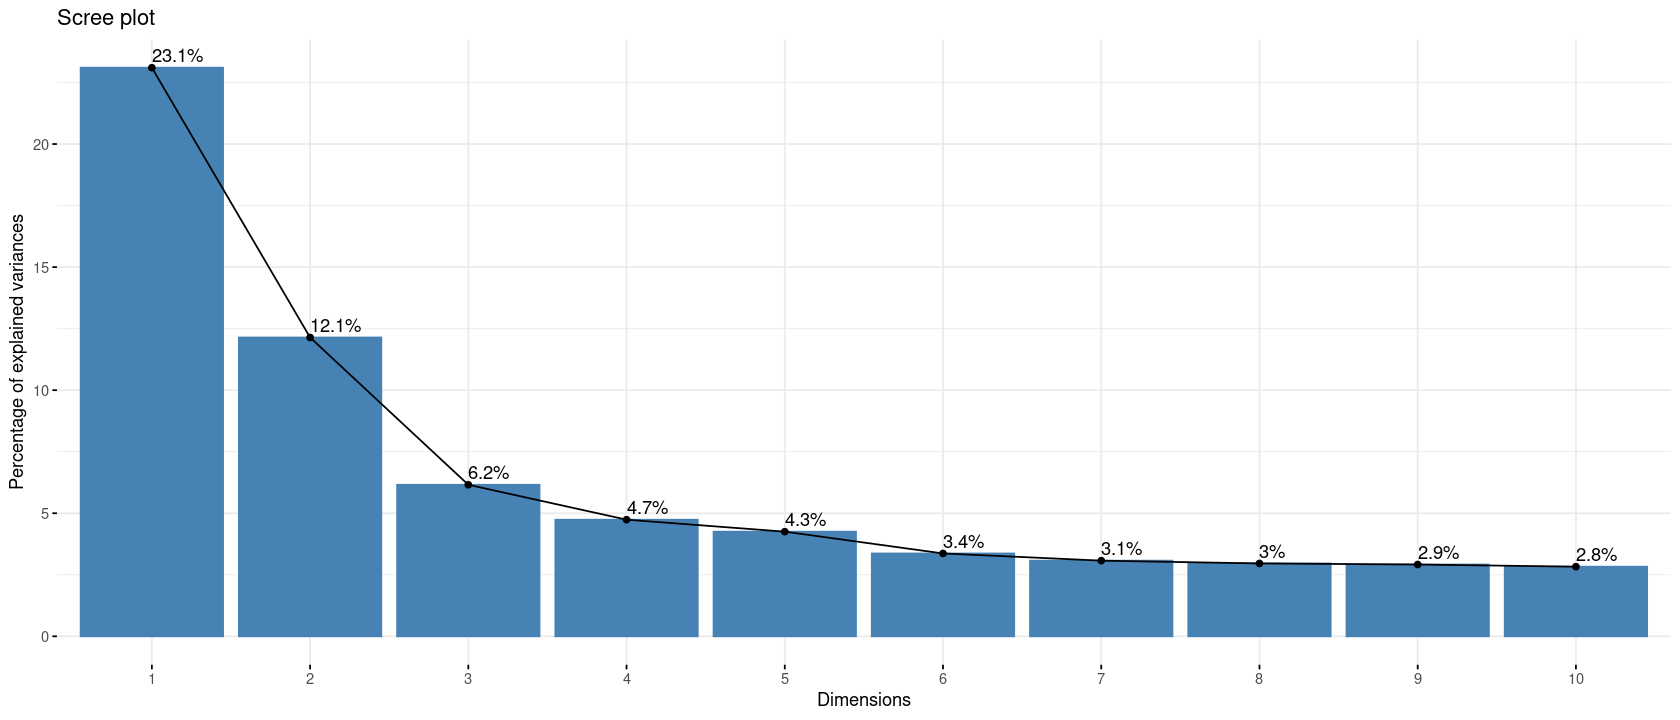

In [63]:
head(res.mca$eig)

fviz_screeplot(res.mca, addlabels=TRUE)

The percentage explained by each dimension is not big. Even with 6 dimensions (out of 12), we can only explain 53% of the variance. We can't do a big reduction of dimension here we this choice of variables. 

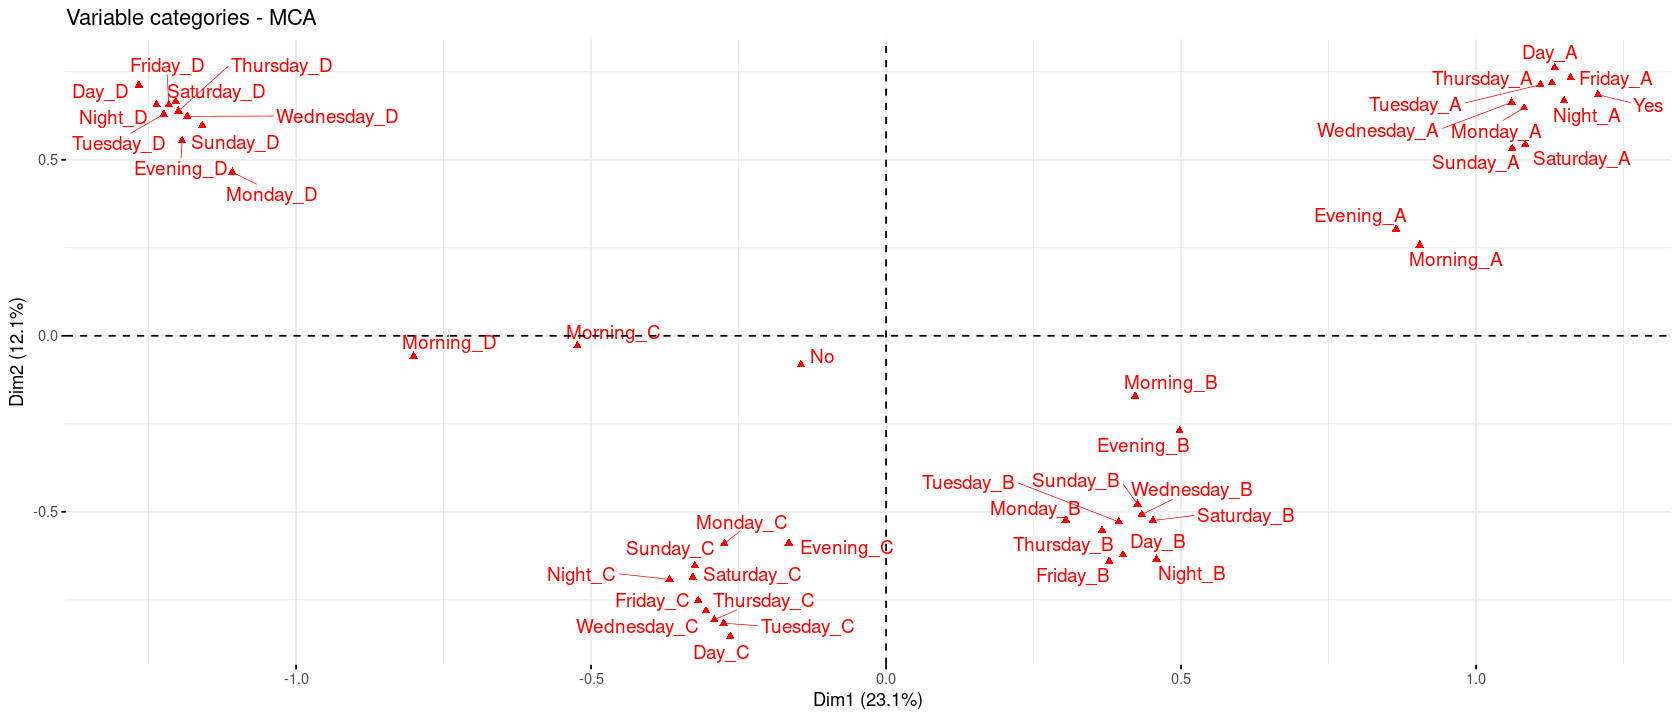

In [64]:
fviz_mca_var(res.mca,repel = TRUE)

We can clearly see that the first dimension explains the loading. On the right, there are only the modalities with a low loading rate (A) and on the left, only with a high loading rate (D). Furthermore, we can observe that the modality Yes (ie. the stations on a hill) is located near the low loading rate so we can deduce that the stations on a hill are less crowded. On the other hand, we cannot say anything about the No modality, it is not well described by the first two dimensions.

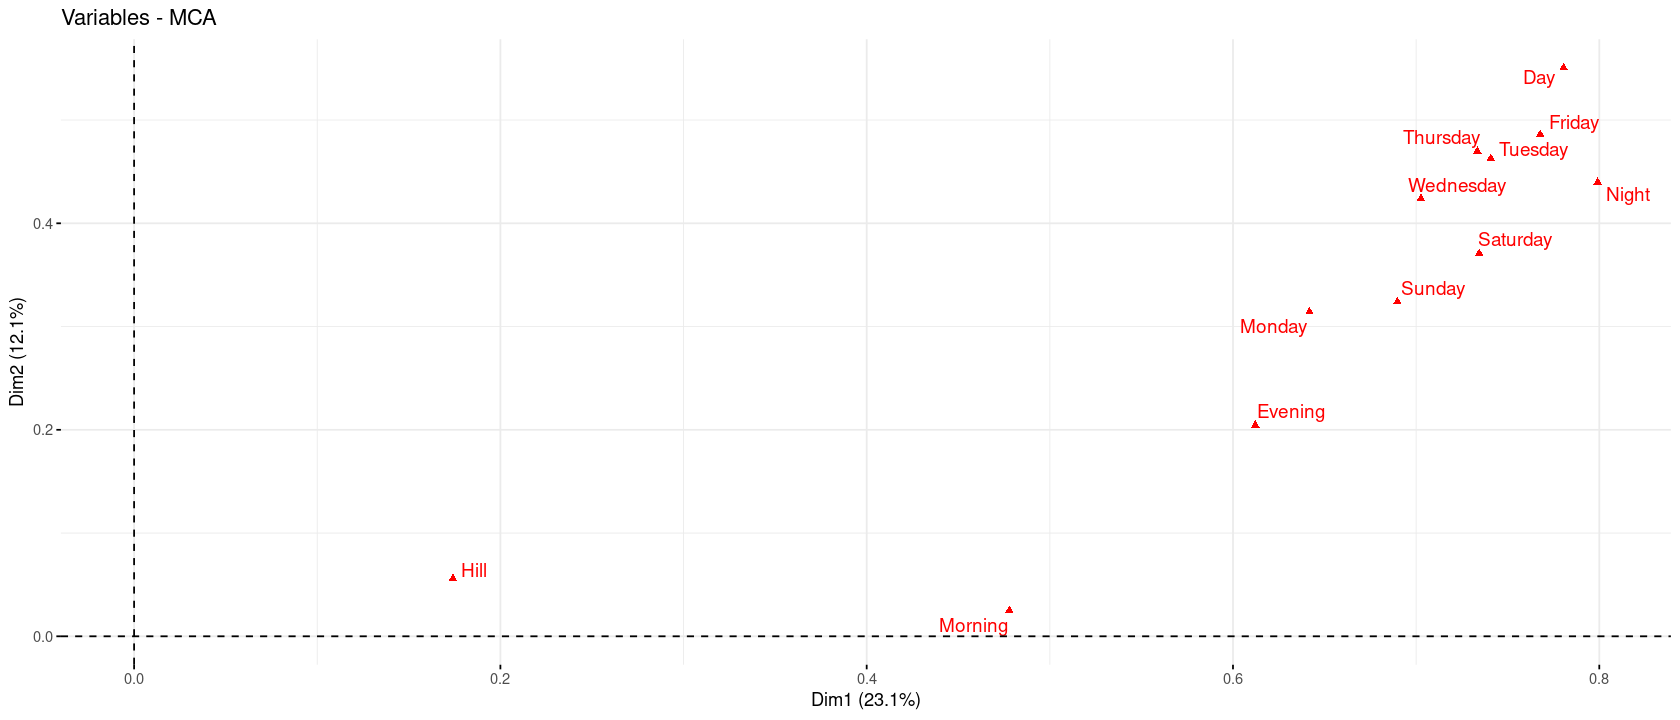

In [65]:
fviz_mca_var(res.mca, choice="mca.cor", repel=TRUE)

With this graph, we can see that the second dimension describes moderately the time of the day. 

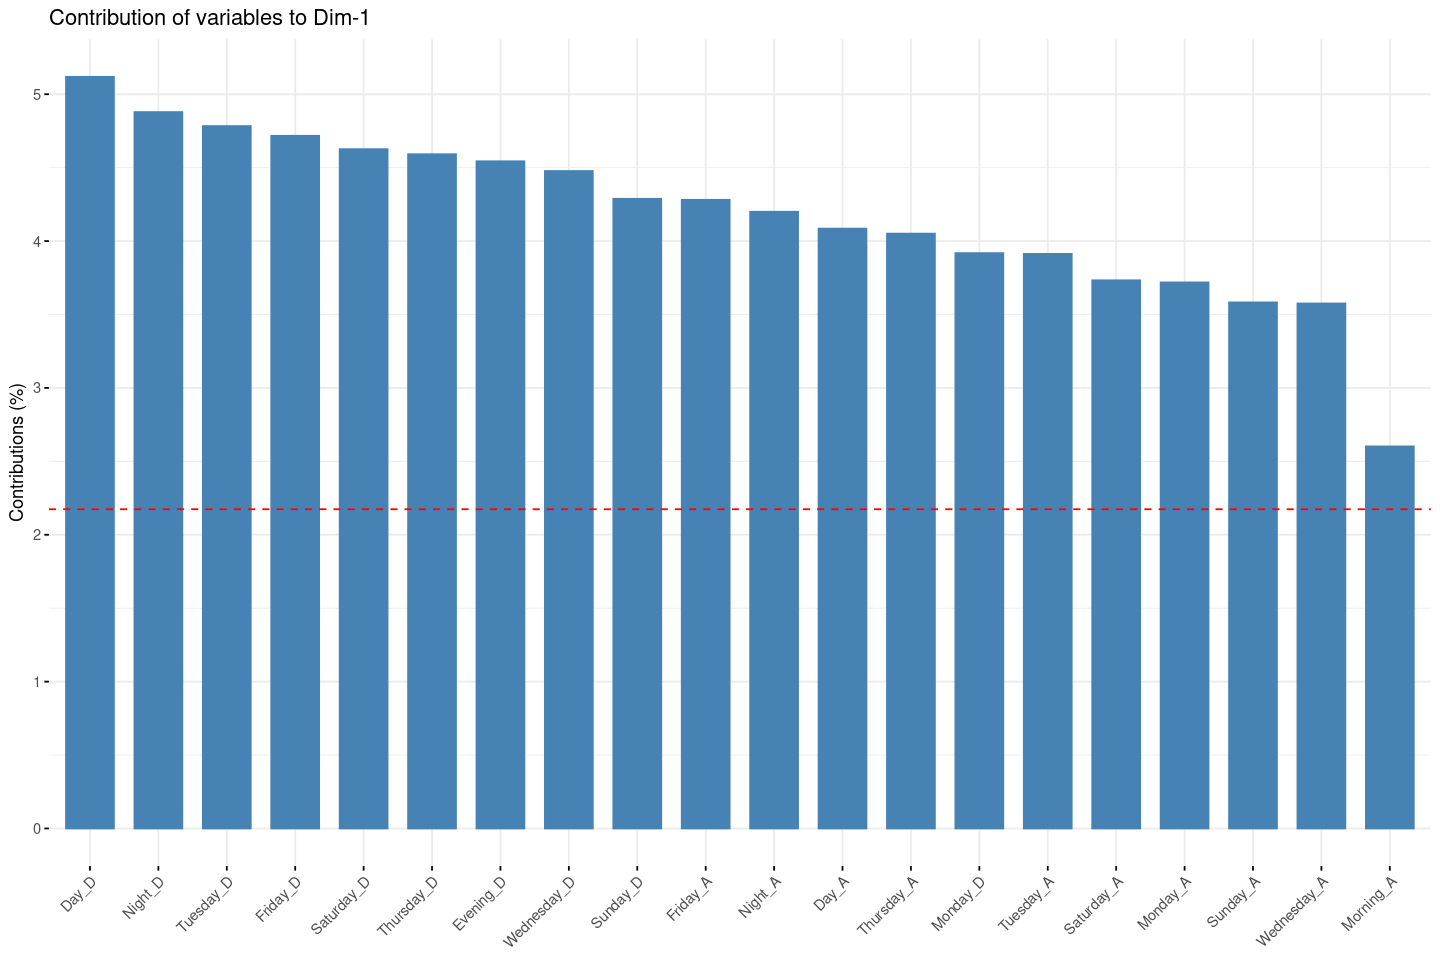

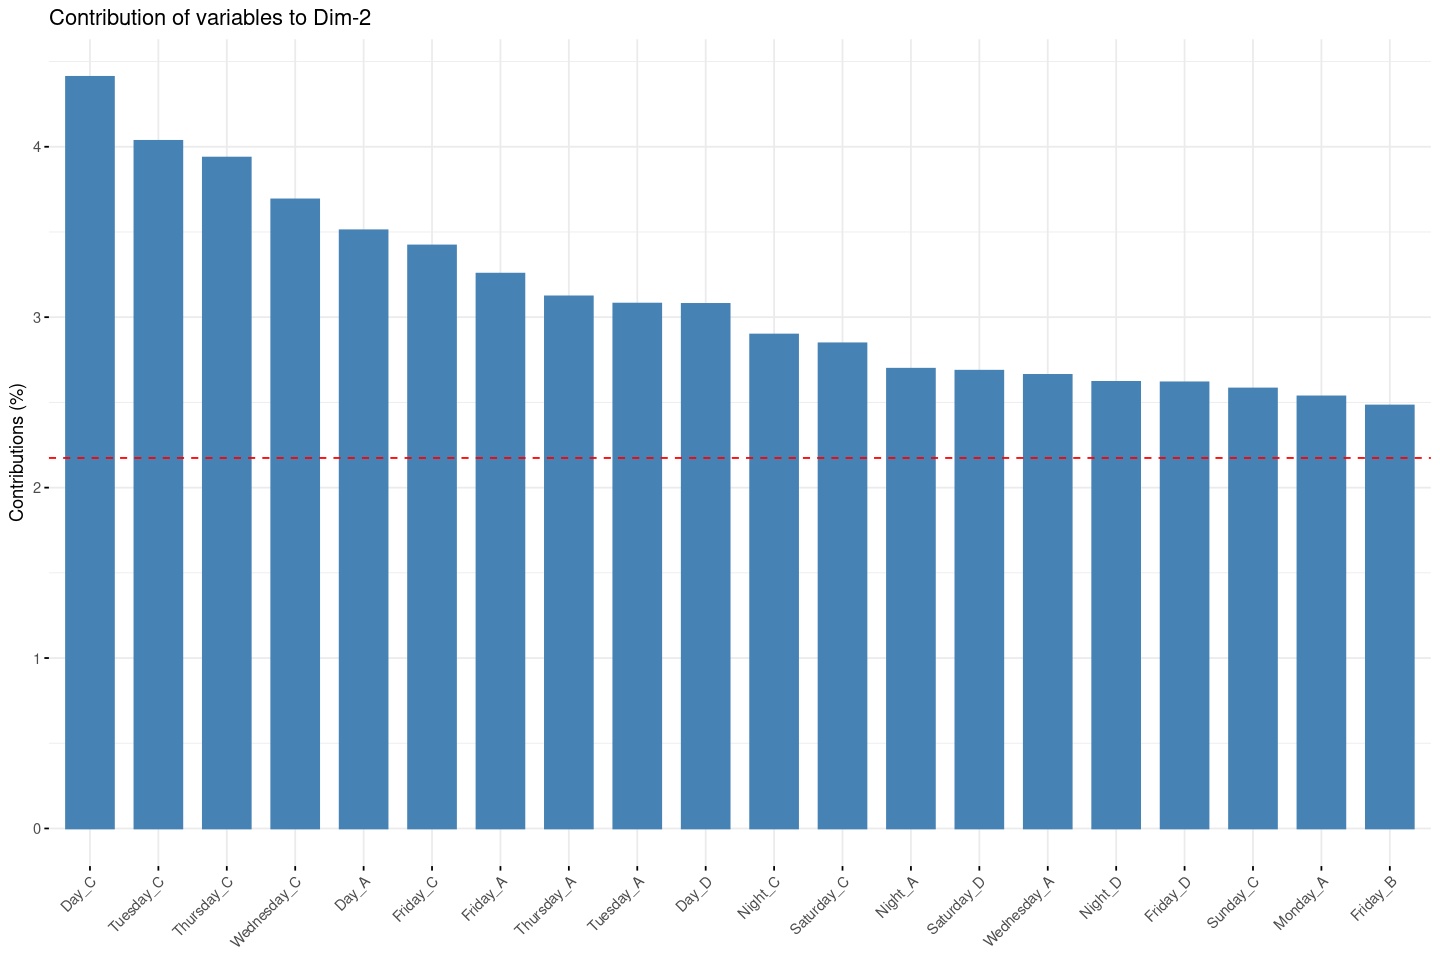

In [93]:

fviz_contrib(res.mca, choice="var", axes=1, top=20)

fviz_contrib(res.mca, choice="var", axes=2, top=20)

We can see that the contribution of the modalities A and D is bigger for the first dimension. For both dimensions, there are not some modalities that have really much bigger contribution than other.

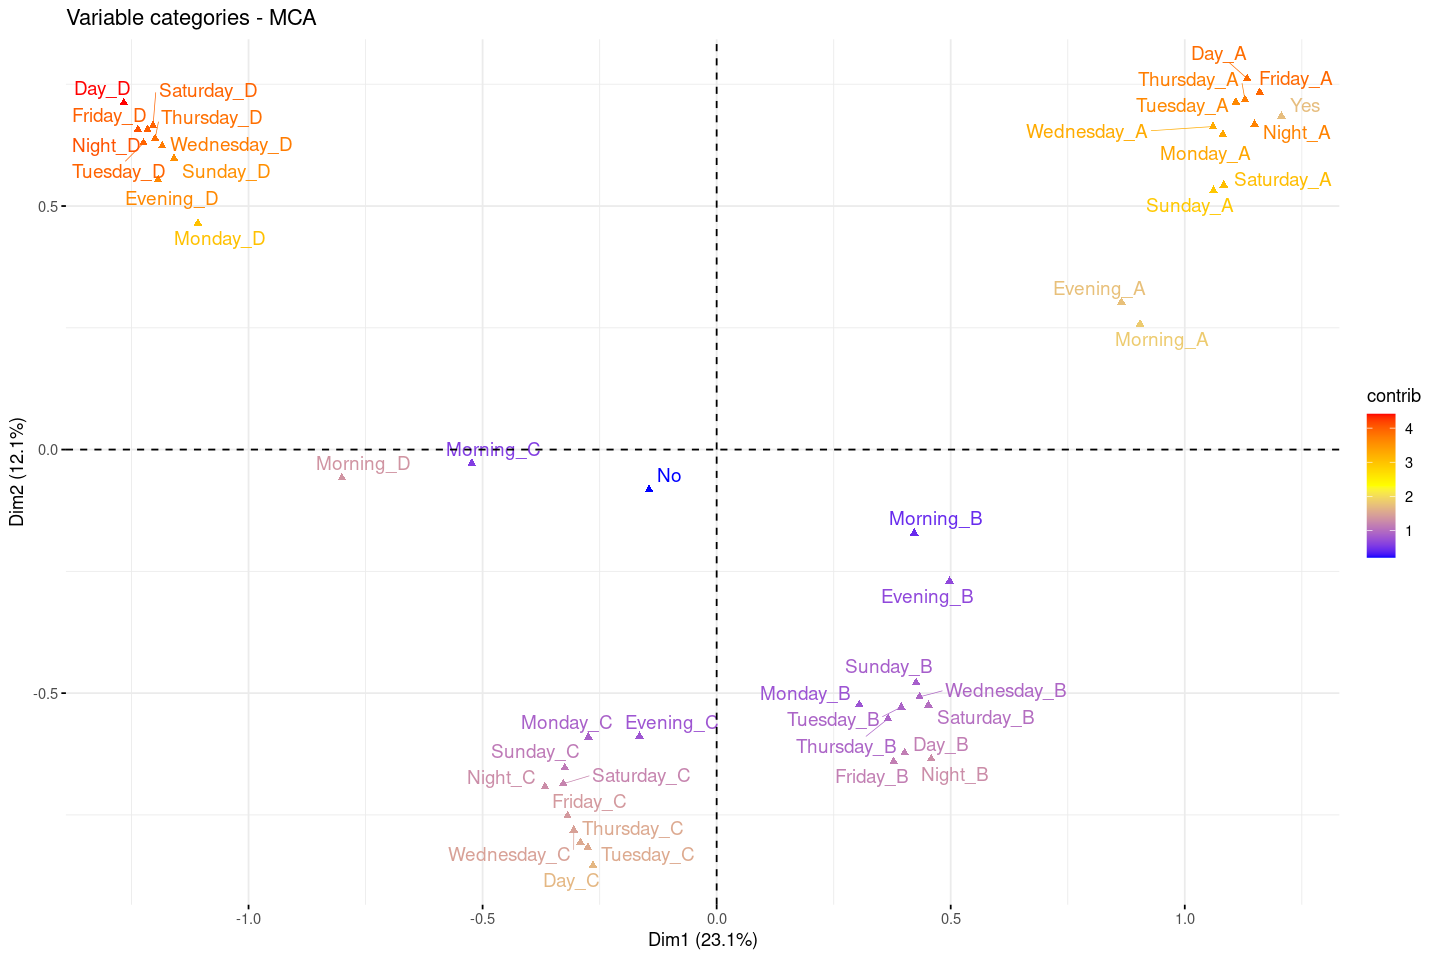

In [94]:
fviz_mca_var(res.mca, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE)

Once again, the loading is well described by the dimensions and explain the contribution. We decided to create a second dataframe to see if we can learn more about the data.

### Second datadrame

In [95]:
# Dividing day into four categories: 
#   0  - 6 + 19 - 23: Night + Evening = NE
#   7 - 18: Day = D

loadMCA3 <- load
d =1
weekNED <- c("MondayNE","MondayD", "TuesdayNE", "TuesdayD","WednesdayNE", "WednesdayD", "ThursdayNE", "ThursdayD", "FridayNE", "FridayD", "SaturdayNE", "SaturdayD", "SundayNE","SundayD")

for (i in seq(0, dim(load)[2]-1, by=24)){
    loadMCA3[, weekNED[d]] <- rowMeans(loadMCA3[, c(seq(i+1,7+i,by=1),seq(20+24,24+24,by=1))])
    loadMCA3[, weekNED[d+1]] <- rowMeans(loadMCA3[, seq(i + 8, i + 19, by=1)])/7
    d <- d + 2  
}


Here, we wanted to divide each day in two.

In [96]:
loadMCA3 <- loadMCA3[,169:182]

In [97]:
for (i in seq(1, dim(loadMCA3)[2])){
    q1 <- quantile(loadMCA3[,i],0.25,names=FALSE)
    q2 <- quantile(loadMCA3[,i],0.5,names=FALSE)
    q3 <- quantile(loadMCA3[,i],0.75,names=FALSE)
    loadMCA3[0<=loadMCA3[,i]&loadMCA3[,i]<q1,i] = 'A'
    loadMCA3[q1<=loadMCA3[,i]&loadMCA3[,i]<q2,i] = 'B'
    loadMCA3[q2<=loadMCA3[,i]&loadMCA3[,i]<q3,i] = 'C'
    loadMCA3[q3<=loadMCA3[,i]&loadMCA3[,i]<=1,i] = 'D'}

Once again, we used the quantiles to create categories.

In [99]:
loadMCA3$Hill <- Hill
print(head(loadMCA3))

  MondayNE MondayD TuesdayNE TuesdayD WednesdayNE WednesdayD ThursdayNE
1        B       A         C        B           C          A          C
2        D       B         D        B           D          B          D
3        C       C         C        D           C          C          C
4        C       D         A        D           B          C          A
5        D       D         C        D           C          D          C
6        C       A         D        B           C          B          C
  ThursdayD FridayNE FridayD SaturdayNE SaturdayD SundayNE SundayD Hill
1         B        C       B          C         B        B       B   No
2         B        D       B          D         C        D       C   No
3         C        C       C          C         C        D       C   No
4         D        A       C          B         C        B       D   No
5         C        C       D          D         C        C       C   No
6         B        C       A          D         D        C      

In [100]:
res2.mca = MCA(loadMCA3, graph=FALSE)

eigenvalue percentage of variance cumulative percentage of variance
dim 1 0.5248375  18.308286              18.30829                         
dim 2 0.2830211   9.872830              28.18112                         
dim 3 0.2378096   8.295685              36.47680                         
dim 4 0.1571578   5.482247              41.95905                         
dim 5 0.1429459   4.986484              46.94553                         
dim 6 0.1205083   4.203777              51.14931

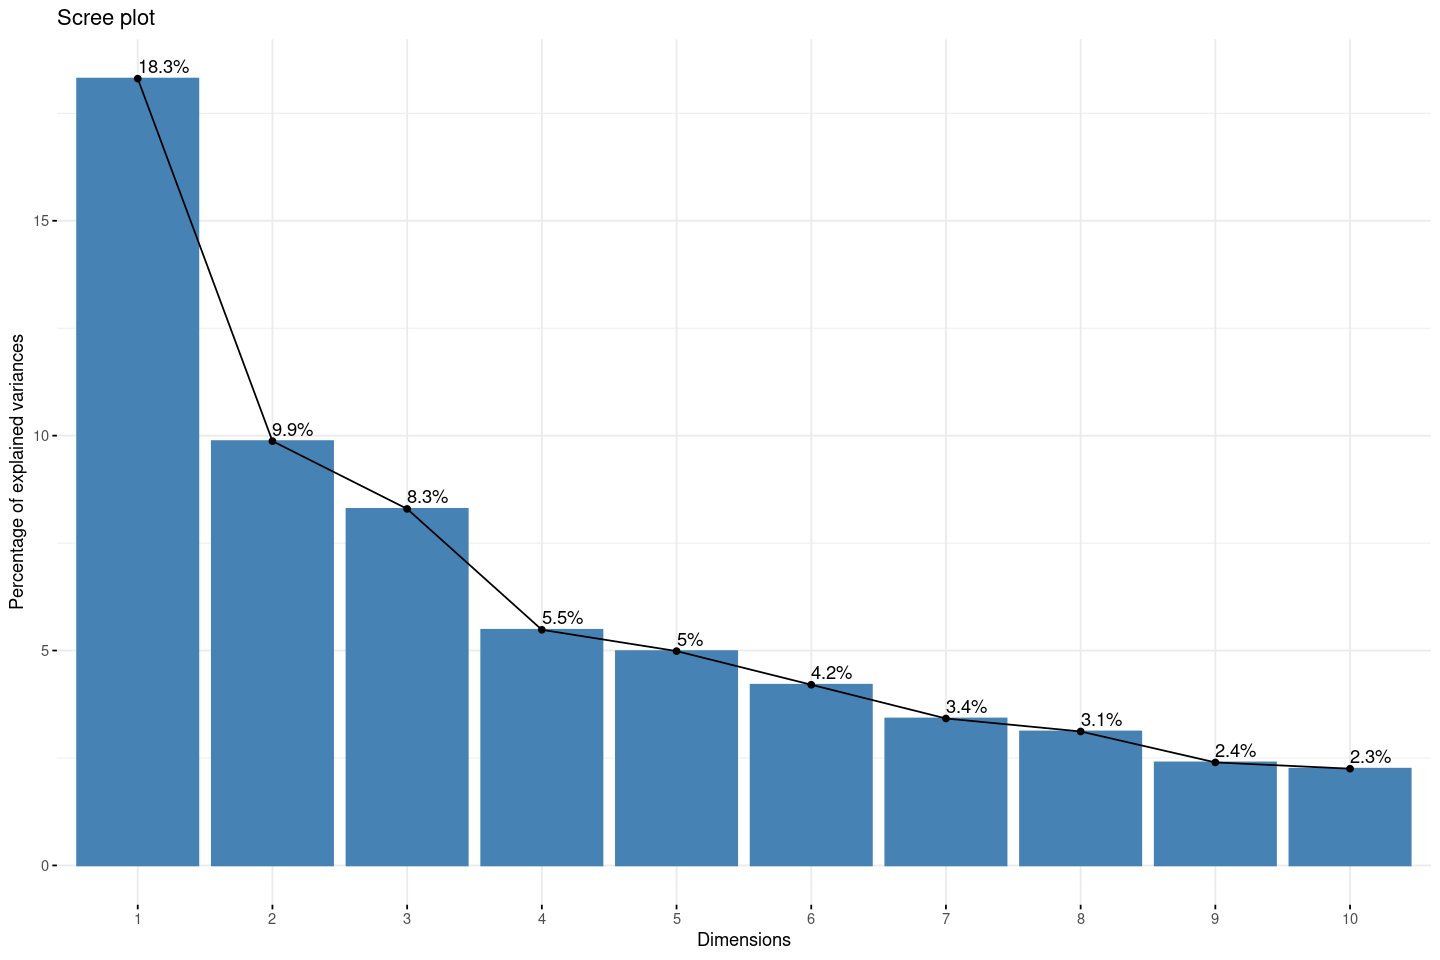

In [101]:
head(res2.mca$eig)

fviz_screeplot(res2.mca, addlabels=TRUE)

The MCA with this second dataframe doesn't really help us more to reduce the dimension. For 6 out of 15 variables, we have 51% of the variance described. It is a bit better than the first dataframe.

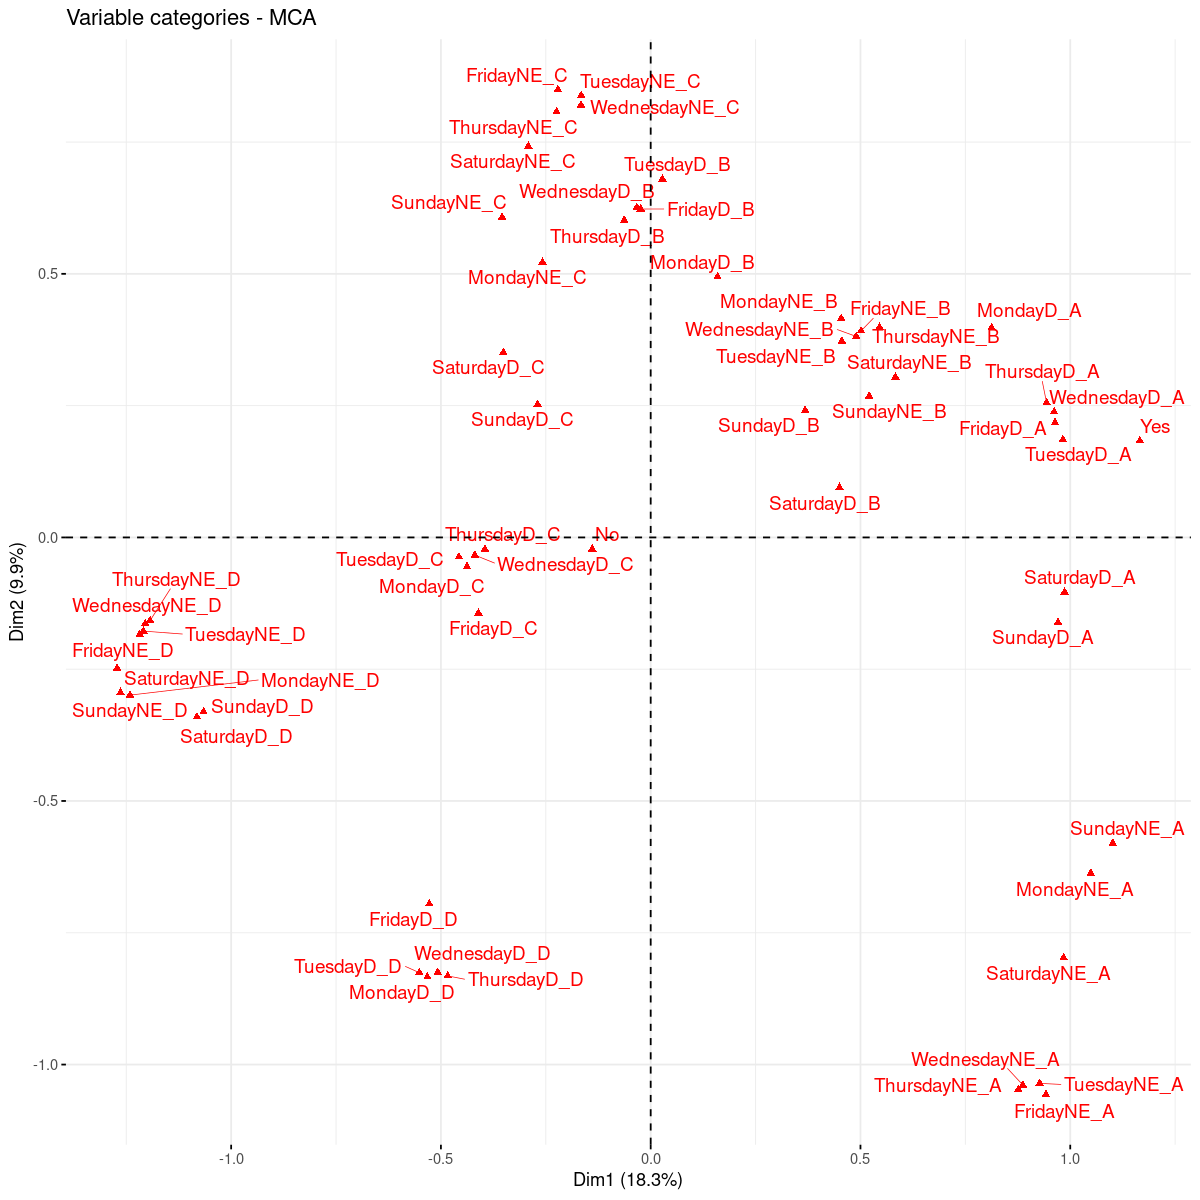

In [102]:
options(repr.plot.width = 10, repr.plot.height =10)
fviz_mca_var(res2.mca,repel = TRUE)

The dimension one explains again the loading rate, with the fullest stations on the right and the emptiest stations at the left. This time, the modalities are better distributed with the dimension 2.

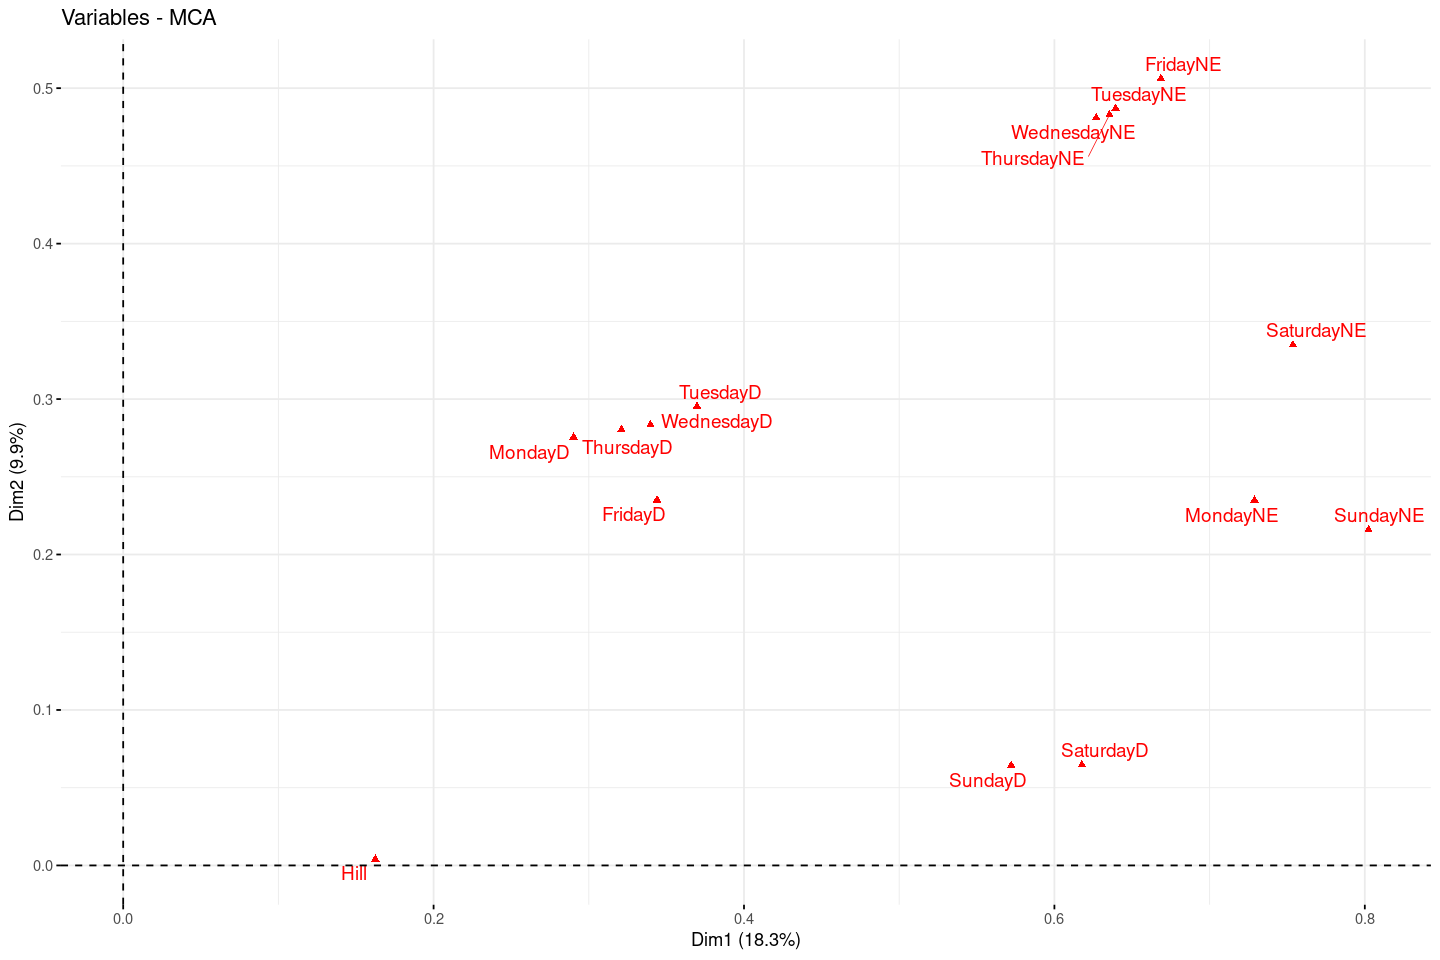

In [90]:
options(repr.plot.width = 12, repr.plot.height =8)
fviz_mca_var(res2.mca, choice="mca.cor", repel=TRUE)

When we only look at the variables, we can clearly see that there is a difference between the day and the night/evening and between the weekdays and the weekend. The dimension two seems to describe the time of the day again. 

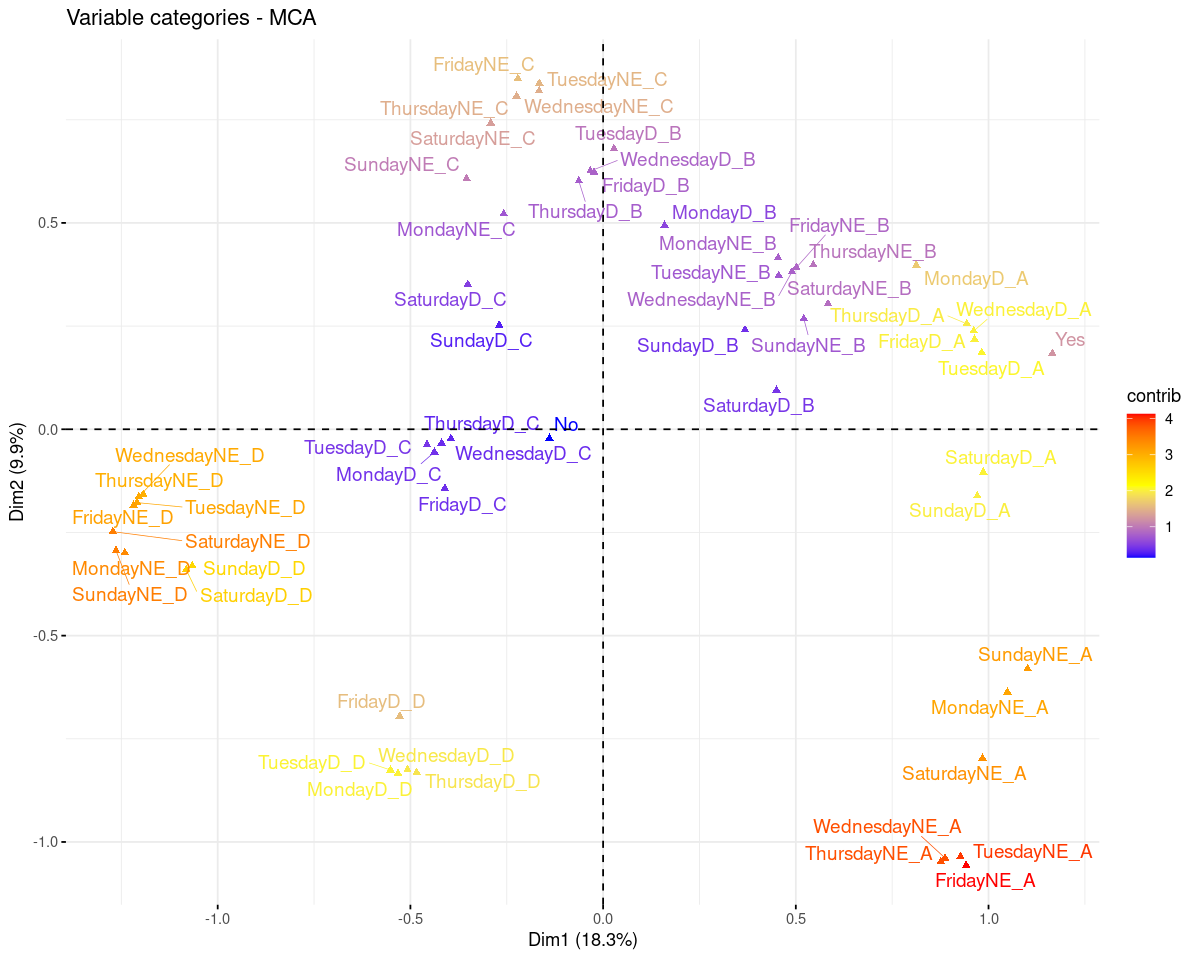

In [89]:
options(repr.plot.width = 10, repr.plot.height =8)
fviz_mca_var(res2.mca, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"), 
             repel = TRUE)